In [5]:
# Main Libraries
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Standard Machine Learning Library (sklearn)
# ML - Feature Engineering
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin, clone
# ML - Feature Selection
from sklearn.feature_selection import SelectKBest, SelectFromModel

# ML - Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier
# ML - Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, LearningCurveDisplay, ValidationCurveDisplay, StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
# ML - Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# ML - Model Interpretation
from sklearn.inspection import permutation_importance, partial_dependence
# ML - Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, PrecisionRecallDisplay

# Imbalance Library
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

# Advance Feature Engineering
from feature_engine.imputation import MeanMedianImputer, AddMissingIndicator
from feature_engine.creation import CyclicalFeatures
from feature_engine.encoding import RareLabelEncoder

from category_encoders import BinaryEncoder

# === Enhancements (idempotent) ===
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, roc_curve, precision_recall_curve, classification_report)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

try:
    from xgboost import XGBClassifier
    XGB_AVAILABLE = True
except Exception:
    XGB_AVAILABLE = False

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

RSEED = 42
pd.set_option("display.max_columns", 120)


In [6]:
DATA_PATH = r"data_ecommerce_customer_churn.csv"
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
display(df.head(3))

Shape: (3941, 11)


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0


- DATA_PATH nyimpen alamat file dataset churn kamu (data_ecommerce_customer_churn.csv).
- pd.read_csv() baca file CSV itu jadi DataFrame df.
- print("Shape:", df.shape) kasih tahu ukuran data → jumlah baris & kolom.
- df.head(3) nunjukin 3 baris pertama biar bisa lihat struktur & isi data secara cepat.

# **Section 1. Business Understanding**

## 1.1 Context

**IndoAgus Store**, sebagai salah satu e-commerce ritel terkemuka di Indonesia, menghadapi tantangan dalam mempertahankan pelanggan lama di tengah persaingan pasar yang semakin ketat. Data menunjukkan adanya kecenderungan customer churn, di mana pelanggan aktif berhenti melakukan transaksi dalam jangka waktu tertentu. Kehilangan pelanggan lama tidak hanya berdampak pada penurunan pendapatan, tetapi juga meningkatkan Customer Acquisition Cost (CAC) karena perusahaan perlu mengeluarkan biaya lebih besar untuk mendapatkan pelanggan baru.

## 1.2 Problem Statement

Saat ini, tim marketing IndoAgus Store melakukan program retensi secara massal tanpa diferensiasi, dengan mengirimkan penawaran promosi ke seluruh pelanggan. Pendekatan ini menyebabkan:

- Biaya promosi tinggi karena target yang tidak tepat sasaran.

- Peluang kehilangan pelanggan berisiko tinggi yang tidak terdeteksi tepat waktu.

- Kurangnya insight terkait pola dan karakteristik pelanggan yang berpotensi churn.

## 1.3 Goals

- Mengembangkan sistem prediksi berbasis Machine Learning untuk mengidentifikasi pelanggan yang berisiko churn.

- Mengoptimalkan biaya kampanye retensi dengan fokus pada pelanggan yang memiliki kemungkinan churn tinggi.

- Memberikan insight berbasis data yang dapat digunakan tim marketing untuk merancang strategi intervensi yang lebih efektif.

## 1.4 Analytical Approach

- Data Preparation

    - Membersihkan data, menangani missing values, melakukan encoding pada fitur kategorikal, dan scaling pada fitur numerik.

- Modeling

    - Mengembangkan beberapa model prediksi (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, XGBoost).

    - Memilih model terbaik dan melakukan hyperparameter tuning menggunakan Optuna.

- Evaluation

    - Mengukur performa model menggunakan PR-AUC sebagai metrik utama.

- Business Simulation

    - Mengestimasi dampak model terhadap penghematan biaya kampanye retensi.

## 1.5 Main Evaluation Metric

- Primary Metric: Precision-Recall AUC (PR-AUC) – relevan untuk data dengan ketidakseimbangan kelas (imbalanced data).

- Secondary Metrics: Precision, Recall, F1-Score, Accuracy.

- Business Metric: Potensi penghematan biaya intervensi dibandingkan pendekatan konvensional.

## 1.6 Expected Outcomes

- Sistem prediksi churn dengan PR-AUC ≥ 0.80.

- Penurunan biaya intervensi tidak efektif minimal 70%.

- Identifikasi segmentasi pelanggan berisiko tinggi untuk intervensi prioritas.

- Meningkatkan tingkat retensi pelanggan melalui kampanye yang lebih tepat sasaran.

## 1.7 Limitation and Challenge

- Imbalanced Data: Proporsi pelanggan churn jauh lebih sedikit dibanding non-churn, yang dapat memengaruhi kinerja model.

- Keterbatasan Variabel: Faktor eksternal seperti tren pasar dan aktivitas kompetitor belum tercakup dalam data.

- Perubahan Perilaku Pelanggan: Model perlu retraining secara berkala untuk menyesuaikan dengan perubahan tren belanja.

- Interpretabilitas Model: Model dengan performa tinggi (misalnya XGBoost) cenderung lebih sulit diinterpretasikan dibandingkan model yang lebih sederhana.



# **Section 2. Data Understanding**

## 2.1 General Information

In [7]:
print("General Information:")
display(df.info())

print("5 First Rows:")
display(df.head())

print("5 Last Rows:")
display(df.tail())

print("5 Random Rows:")
display(df.sample(5))

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


None

5 First Rows:


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


5 Last Rows:


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1
3940,2.0,7.0,3,Laptop & Accessory,5,Married,1,0,2.0,153.73,0


5 Random Rows:


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
1365,20.0,9.0,4,Laptop & Accessory,2,Married,4,0,5.0,198.79,0
1822,6.0,13.0,4,Laptop & Accessory,3,Single,3,0,8.0,175.10,0
2029,16.0,30.0,5,Laptop & Accessory,3,Single,3,0,8.0,168.32,0
786,9.0,12.0,1,Laptop & Accessory,5,Married,4,1,2.0,155.62,0
314,8.0,17.0,4,Mobile Phone,3,Divorced,3,1,1.0,147.20,0


## 2.2 Feature Information

| Feature Name               | Description                                                                 | Business Impact |
|----------------------------|------------------------------------------------------------------------------|-----------------|
| Tenure                     | Lama pelanggan berlangganan atau menjadi customer (dalam bulan)             | Menunjukkan loyalitas pelanggan; pelanggan dengan tenure rendah lebih berisiko churn sehingga dapat menjadi target retensi |
| WarehouseToHome            | Jarak dari gudang ke rumah pelanggan (dalam km)                             | Jarak yang lebih jauh dapat mempengaruhi waktu pengiriman dan kepuasan pelanggan, sehingga mempengaruhi risiko churn |
| NumberOfDeviceRegistered   | Jumlah perangkat yang terdaftar pada akun pelanggan                         | Semakin banyak perangkat terdaftar biasanya menunjukkan keterikatan tinggi, mengurangi risiko churn |
| PreferedOrderCat           | Kategori pesanan favorit pelanggan                                          | Informasi ini dapat digunakan untuk personalisasi penawaran dan kampanye pemasaran |
| SatisfactionScore          | Skor kepuasan pelanggan terhadap layanan (skala 1-5)                        | Skor rendah menjadi indikator awal potensi churn, sehingga memerlukan intervensi layanan |
| MaritalStatus              | Status pernikahan pelanggan                                                 | Dapat mempengaruhi jenis produk yang dibeli; bermanfaat untuk segmentasi pasar |
| NumberOfAddress            | Jumlah alamat yang terdaftar pada akun pelanggan                            | Bisa menjadi indikator mobilitas atau gaya hidup pelanggan; mempengaruhi kebutuhan logistik |
| Complain                   | Apakah pelanggan pernah mengajukan komplain (0 = Tidak, 1 = Ya)             | Pelanggan yang pernah komplain cenderung memiliki risiko churn lebih tinggi jika masalah tidak ditangani |
| DaySinceLastOrder          | Jumlah hari sejak pesanan terakhir pelanggan                                | Nilai yang tinggi dapat menjadi sinyal awal penurunan aktivitas dan potensi churn |
| CashbackAmount             | Jumlah cashback yang diterima pelanggan                                     | Cashback yang tinggi dapat meningkatkan loyalitas dan mengurangi risiko churn |
| Churn                      | Status churn pelanggan (0 = Tidak churn, 1 = Churn)                         | Target variabel untuk analisis; membantu mengukur efektivitas strategi retensi |


## 2.3 Statistics Summary

In [8]:
print("Numerical Summary:")
display(df.describe())

print("Categorical Summary:")
display(df.describe(include='object'))

Numerical Summary:


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


Categorical Summary:


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


# **Section 3. Data Generation**

In [9]:
# Step 1: Copy dataframe for EDA
df_eda = df.copy()

target_column = 'Churn'

# Step 2: Split into seen & unseen data (80:20 stratified)
data_seen, data_unseen = train_test_split(
    df, 
    test_size=0.2, 
    random_state=42, 
    stratify=df[target_column]
)

# Step 3: Split seen data menjadi train & test (80:20 stratified)
data_train, data_test = train_test_split(
    data_seen, 
    test_size=0.2, 
    random_state=42, 
    stratify=data_seen[target_column]
)

- df.copy() bikin salinan df jadi df_eda, biar kalau nanti EDA ngubah-ngubah data, file aslinya tetap aman.
- target_column = 'Churn' nunjukin kolom label (0/1) yang mau diprediksi.
- Step 2: train_test_split pertama → bagi data jadi seen (80%) & unseen (20%). stratify dipakai supaya proporsi churn/non-churn tetap sama di kedua bagian.
- Step 3: train_test_split kedua → seen data (80%) dipecah lagi jadi train & test (masing-masing 80%:20%), juga dengan stratifikasi.

# **Section 4. Data Exploration**

In [10]:
from skrub import TableReport


# General table report
report = TableReport(df_eda)
report

Processing column  11 / 11


,,,,,,,,,,,


## 4.1 Identify Missing Values

In [11]:
# Cek total missing values per kolom & tampilkan persentasenya

null_values = df_eda.isnull().sum()

if null_values.any():
    # Buat dataframe ringkas (kolom, jumlah missing, persentase)
    missing_report = pd.DataFrame({
        'Total Missing': null_values,
        'Percent': (null_values / df_eda.shape[0] * 100).round(2).astype(str) + '%'
    })
    # Filter hanya kolom yang memang ada missing value
    missing_report = missing_report[missing_report['Total Missing'] > 0]
    print(missing_report)
else:
    print("No missing values found.")


                   Total Missing Percent
Tenure                       194   4.92%
WarehouseToHome              169   4.29%
DaySinceLastOrder            213    5.4%


Ada tiga kolom dengan missing values kecil (<6%) — Tenure, WarehouseToHome, dan DaySinceLastOrder — yang aman diimputasi nanti saat preprocessing.

## 4.2 Identify Duplicated Values

In [12]:
# Cek baris duplikat secara persis
n_duplicates = df_eda.duplicated().sum()

if n_duplicates > 0:
    print(f"Duplicate rows found: {n_duplicates}")
    # Tampilkan beberapa contoh duplikat (misal 5 baris pertama)
    duplicated_rows = df_eda[df_eda.duplicated(keep=False)]
    print("Sample duplicated rows:")
    print(duplicated_rows.head())
else:
    print("No duplicate rows found.")


Duplicate rows found: 671
Sample duplicated rows:
    Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
4     30.0             15.0                         4              Others   
7      1.0             11.0                         4        Mobile Phone   
8     11.0             12.0                         4        Mobile Phone   
11    16.0             20.0                         2  Laptop & Accessory   
25    18.0             26.0                         3  Laptop & Accessory   

    SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
4                   4        Single                8         0   
7                   5        Single                3         0   
8                   3       Married                2         0   
11                  5       Married                7         0   
25                  3        Single                9         0   

    DaySinceLastOrder  CashbackAmount  Churn  
4                 8.0          322.17      

Output ini nunjukin kalau ada 671 baris duplikat di dataset, contohnya beberapa ditampilkan di bawah.
Artinya, data pelanggan tersebut tercatat lebih dari sekali dengan nilai semua kolom sama persis.

Insight:

Jumlahnya lumayan besar (671/3941 ≈ 17%), jadi penting diputuskan: hapus duplikat atau cek apakah itu memang pelanggan yang sama dengan transaksi berbeda (kalau iya, mungkin perlu agregasi).

Kalau tujuannya analisis churn per pelanggan, duplikat biasanya dihapus biar model nggak bias.

## 4.3 Identify Spelling Error

In [13]:
categorical_cols = df_eda.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['PreferedOrderCat', 'MaritalStatus']


In [14]:
for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df_eda[col].unique())
    print("-" * 20)


Unique values in PreferedOrderCat:
['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']
--------------------
Unique values in MaritalStatus:
['Single' 'Married' 'Divorced']
--------------------


In [15]:
from polyfuzz import PolyFuzz
import pandas as pd

# Inisialisasi list untuk simpan semua hasil similar
similar_list = []

for col in categorical_cols:
    unique_vals = df_eda[col].dropna().unique().tolist()
    if len(unique_vals) > 1:
        model = PolyFuzz("TF-IDF")
        model.match(unique_vals, unique_vals)
        matches_categories = model.get_matches()
        similar = matches_categories[
            (matches_categories["From"] != matches_categories["To"]) &
            (matches_categories["Similarity"] > 0.80)
        ].copy()
        if not similar.empty:
            similar["Column"] = col  # Tambahkan nama kolom asal
            similar_list.append(similar)

# Gabungkan semua hasil ke satu dataframe
if similar_list:
    df_similar_categories = pd.concat(similar_list, ignore_index=True)
    print(df_similar_categories)
else:
    print("No similar category groupings found with similarity > 0.80.")


No similar category groupings found with similarity > 0.80.


## 4.4 Target Distribution Analysis

In [16]:
display(df_eda["Churn"].value_counts().apply(lambda x: f"{x} ({round(x/len(df_eda)*100, 2)}%)"))
print("The target is highly imbalanced.")

Churn
0    3267 (82.9%)
1     674 (17.1%)
Name: count, dtype: object

The target is highly imbalanced.


Output ini nunjukin distribusi label Churn:
0 (Tidak Churn): 3267 pelanggan (~82.9%)
1 (Churn): 674 pelanggan (~17.1%)

Insight:

Dataset imbalanced (mayoritas tidak churn), jadi model cenderung “main aman” nebak tidak churn.
Perlu teknik penanganan imbalance (mis. class_weight='balanced' atau SMOTE) supaya model nggak mengabaikan kasus churn.

## 4.5 Feature Analysis

### 4.5.1 Feature Distribution Analysis

In [17]:
# Feature Distribution
TableReport(df_eda.drop("Churn", axis=1))

Processing column  10 / 10


,,,,,,,,,,


In [18]:
print(df_eda.select_dtypes(include=['number']).columns)

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')


In [19]:
num_cols = [
    'Tenure',             
    'WarehouseToHome', 
    'NumberOfDeviceRegistered',
    'SatisfactionScore', 
    'NumberOfAddress', 
    'Complain',
    'DaySinceLastOrder',
    'CashbackAmount'   
]
# Gunakan hanya kolom yang benar-benar ada di dataset
num_cols = [col for col in num_cols if col in df_eda.columns]
print("Kolom numerik untuk outlier:", num_cols)


Kolom numerik untuk outlier: ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']


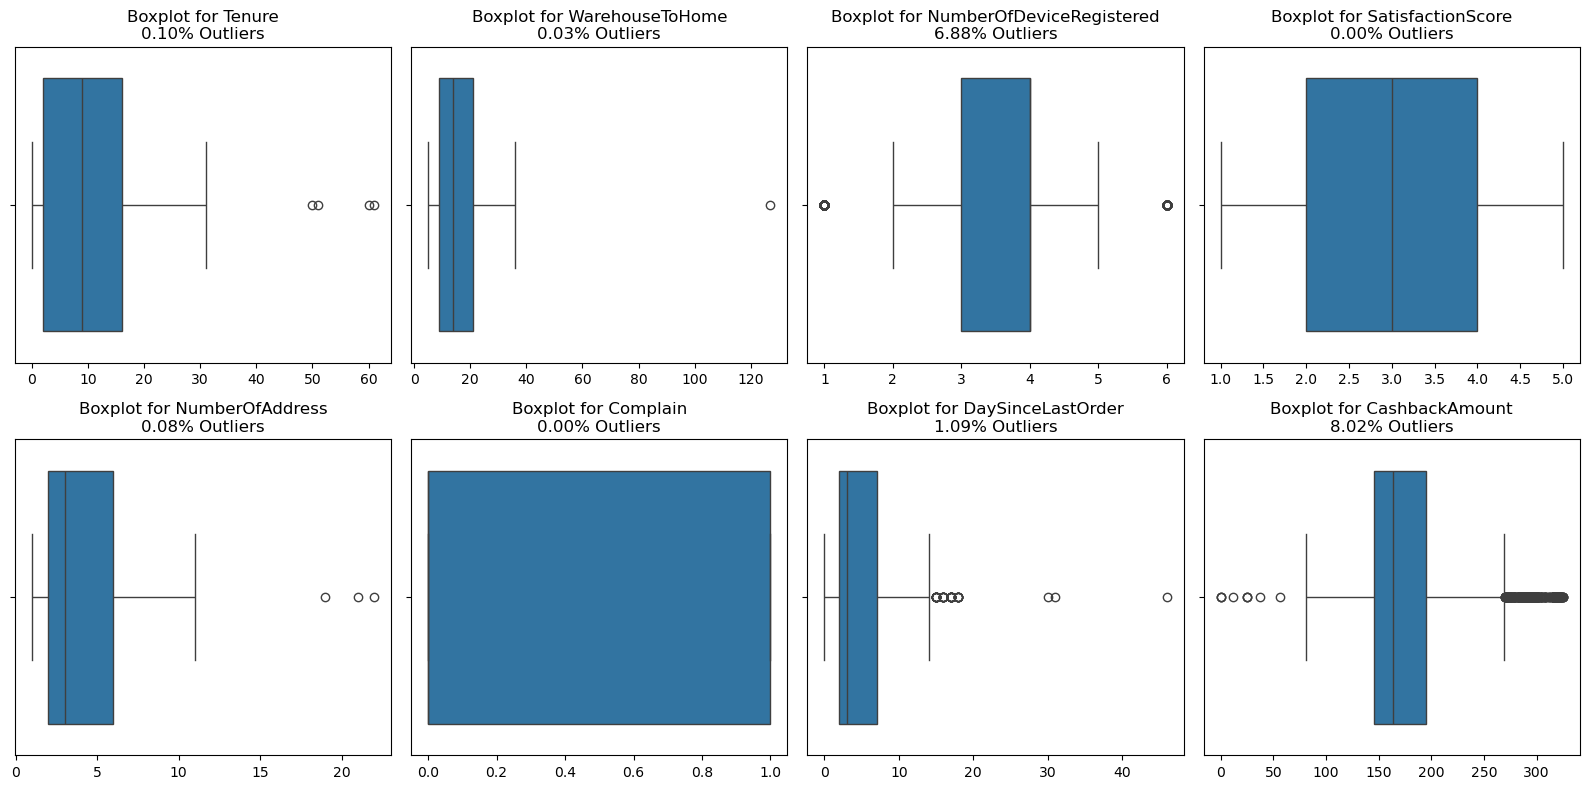

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 4 * ((len(num_cols)+3)//4)))  # Dynamic height

for idx, col in enumerate(num_cols, start=1):
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = df_eda[(df_eda[col] < lower_bound) | (df_eda[col] > upper_bound)]
    
    ax = plt.subplot((len(num_cols)+3)//4, 4, idx)
    sns.boxplot(data=df_eda, x=col, ax=ax)
    ax.set_title(f"Boxplot for {col}\n{len(outliers)/len(df_eda):.2%} Outliers")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()


Hampir semua fitur punya outlier sangat sedikit (<1%), kecuali:
NumberOfDeviceRegistered: 6.88% outliers
CashbackAmount: 8.02% outliers
Outlier ini kelihatan sebagai titik-titik di luar whisker boxplot.
Complain dan SatisfactionScore tidak punya outlier sama sekali.

Insight:
Outlier kecil biasanya tidak perlu dibuang, apalagi kalau punya makna bisnis (contoh: cashback tinggi memang wajar kalau promo besar).
Tapi untuk model sensitif seperti Logistic Regression, outlier bisa memengaruhi hasil, jadi bisa dipertimbangkan scaling/transformasi atau winsorization.

In [21]:
for col in df_eda.select_dtypes("object").columns:
    print("="*60)
    print(f"Column: {col}")
    print(f"Unique Values: {df_eda[col].nunique()}")
    print("-"*30)
    print(df_eda[col].value_counts().apply(
        lambda x: f"{x} ({round(x/len(df_eda)*100, 2)}%)"
    ))
    print()


Column: PreferedOrderCat
Unique Values: 6
------------------------------
PreferedOrderCat
Laptop & Accessory    1458 (37.0%)
Mobile Phone          887 (22.51%)
Fashion               585 (14.84%)
Mobile                559 (14.18%)
Grocery                273 (6.93%)
Others                 179 (4.54%)
Name: count, dtype: object

Column: MaritalStatus
Unique Values: 3
------------------------------
MaritalStatus
Married     2055 (52.14%)
Single      1310 (33.24%)
Divorced     576 (14.62%)
Name: count, dtype: object



PreferedOrderCat → mayoritas pelanggan pesan Laptop & Accessory (37%) dan Mobile Phone (22.51%), sisanya tersebar di Fashion, Mobile, Grocery, dan Others.

MaritalStatus → lebih dari separuh pelanggan sudah Married (52.14%), sisanya Single (33.24%) dan Divorced (14.62%).

### 4.5.2 Feature Correlation Analysis

In [22]:
features = df_eda.drop("Churn", axis=1)
TableReport(features)

Processing column  10 / 10


,,,,,,,,,,


## 4.6 Fraud Analysis

In [23]:
features = df_eda.drop("Churn", axis=1)
cat_cols = features.select_dtypes("object").columns

for col in cat_cols:
    print(f"column: {col}")
    display(pd.crosstab(df_eda[col], df_eda["Churn"], normalize="index").sort_values(by=1, ascending=False))

column: PreferedOrderCat


Churn,0,1
PreferedOrderCat,,
Mobile Phone,0.712514,0.287486
Mobile,0.715564,0.284436
Fashion,0.839316,0.160684
Laptop & Accessory,0.902606,0.097394
Others,0.932961,0.067039
Grocery,0.956044,0.043956


column: MaritalStatus


Churn,0,1
MaritalStatus,,
Single,0.729008,0.270992
Divorced,0.845486,0.154514
Married,0.888078,0.111922


Output ini nunjukin proporsi churn untuk tiap kategori pada dua fitur:

PreferedOrderCat

Churn paling tinggi ada di kategori Mobile Phone (28.75%) dan Mobile (28.44%).

Kategori Grocery dan Others punya churn rendah (~4–6%).

MaritalStatus

Pelanggan Single punya churn lebih tinggi (27.09%) dibanding Married (11.19%) atau Divorced (15.45%).

Insight:
Fitur ini bisa jadi sinyal kuat buat model: pelanggan mobile-oriented & single cenderung lebih mudah churn.

Dari sisi bisnis, segmen ini bisa jadi target prioritas untuk kampanye retensi.

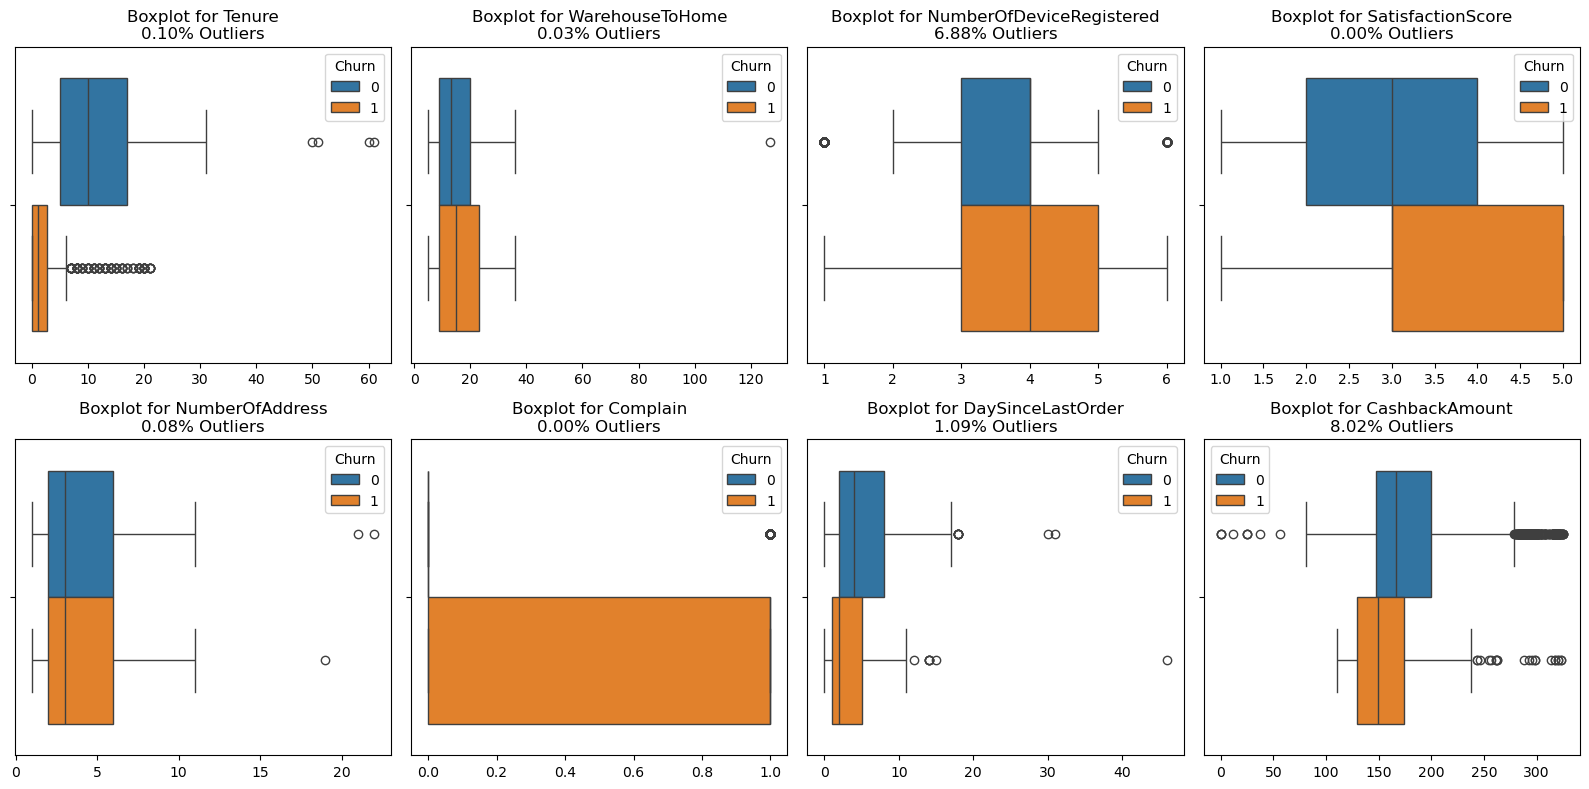

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 4 * ((len(num_cols)+3)//4)))

for idx, col in enumerate(num_cols, start=1):
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers = df_eda[(df_eda[col] < lower_bound) | (df_eda[col] > upper_bound)]
    
    ax = plt.subplot((len(num_cols)+3)//4, 4, idx)
    sns.boxplot(data=df_eda, x=col, hue="Churn", ax=ax)
    ax.set_title(f"Boxplot for {col}\n{len(outliers)/len(df_eda):.2%} Outliers")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()


## 4.7 Data Cleaning

### 4.7.1 Data Duplikat

In [25]:
dfuniq = pd.DataFrame({
    'dataFeatures': df.columns,
    'unique': [df[col].nunique() for col in df.columns],
    'uniqueSample': [df[col].unique() for col in df.columns]
})
dfuniq

,dataFeatures,unique,uniqueSample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Dari data diatas dapat dilihat bahwa tidak ada typo. Selain itu, dari fitur kategori yang disukai terdapat 2 kategori yang sama yaitu 'Mobile' dan 'Mobile Phone', sehingga nantinya semua baris dengan kategori 'Mobile' pada kolom tersebut akan diganti menjadi 'Mobile Phone'.

In [26]:
# Menghitung Jumlah per Kategori
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: count, dtype: int64

In [27]:
# Mengubah Mobile menjadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: count, dtype: int64

''Mobile' dan 'Mobile Phone' sudah digabung atau disesuaikan menjadi satu yaitu menjadi 'Mobile Phone'

In [28]:
# Melihat Jumlah Data Duplikat
duplikat = df.duplicated().sum()
PersentaseDup = round((df.duplicated().sum()/df.shape[0])*100,2)
print (f'Data duplikat : {duplikat}, Persentase Data Duplikat: {PersentaseDup}')

Data duplikat : 672, Persentase Data Duplikat: 17.05


Terdapat 672 baris duplikat dari 3.941 baris (≈ 17,05%). Karena tidak ada customer ID, baris-baris ini dianggap duplikat penuh. Untuk mencegah bias saat pelatihan dan evaluasi—terutama jika duplikat terbagi ke train dan test (bisa bikin metrik tampak terlalu bagus)—semua duplikat dihapus (deduplikasi dilakukan sebelum train–test split).

In [29]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)
print(f'shape data: {df.shape}, cek data duplikat: {df.duplicated().sum()}')

shape data: (3269, 11), cek data duplikat: 0


### 4.7.2 Missing Values

In [30]:
# Melihat Missing Value masing-masing kolom
df.isna().sum()

Tenure                      159
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [31]:
# Kalkulasi Missing Value
total_missing = df.isnull().sum().sum()
rows_with_missing = df.isnull().any(axis=1).sum()
percent_rows_with_missing = round(rows_with_missing / len(df) * 100, 2)

print(f"""
Jumlah missing value           : {total_missing}
Jumlah baris dengan missing    : {rows_with_missing}
Persentase baris dengan missing: {percent_rows_with_missing}%
""")



Jumlah missing value           : 475
Jumlah baris dengan missing    : 475
Persentase baris dengan missing: 14.53%



Jumlah missing value mencapai 14,53%, sehingga baris yang mengandungnya tidak dihapus untuk menghindari berkurangnya data dan informasi penting. Semua missing value berada pada fitur numerik bertipe float dengan skala kontinu. Analisis lanjutan menggunakan package missingno akan membantu mengidentifikasi pola dan sifat missingness, sehingga metode imputasi yang tepat dapat dipilih.

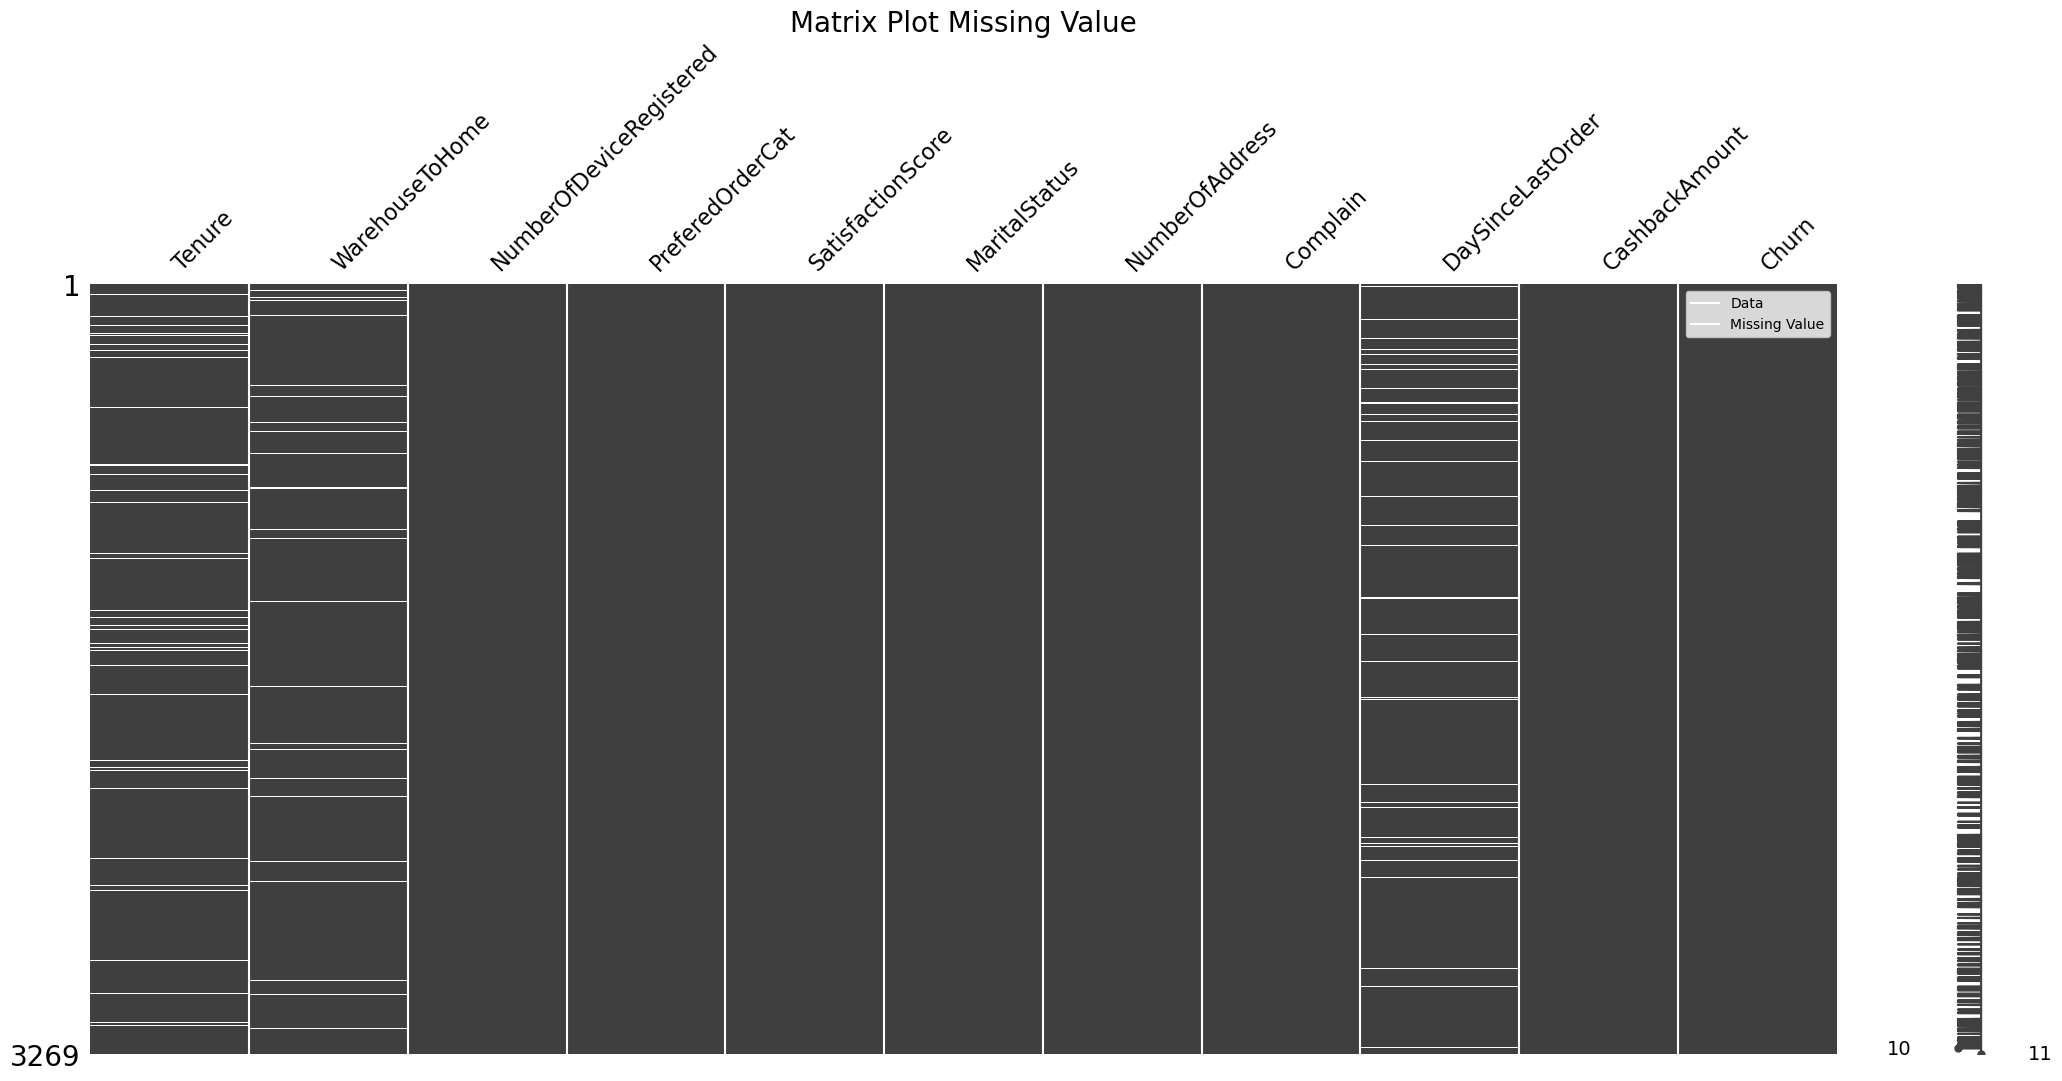

In [32]:
import missingno as msno
import matplotlib.pyplot as plt

# Melihat missing value dengan matrix plot
msno.matrix(df)
plt.legend(
    ['Data', 'Missing Value'],
    loc='upper right',
    frameon=True
)
plt.title('Matrix Plot Missing Value', fontsize=20)
plt.show()


Dapat dilihat bahwa missing value polanya cukup acak 

In [33]:
# Describe kolom missing value berdasarkan tenure
df[df['Tenure'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,0.0,159.000000,159.000000,159,159.000000,159,159.000000,159.000000,159.000000,159.000000,159.000000
unique,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,152,NaN,75,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.408805,3.238994,NaN,3.100629,NaN,3.201258,0.264151,2.150943,120.415535,0.295597
std,NaN,7.680498,0.822616,NaN,1.303331,NaN,2.425549,0.442273,2.413540,2.744332,0.457753
min,NaN,6.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,112.000000,0.000000
25%,NaN,8.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,0.000000,120.280000,0.000000
50%,NaN,13.000000,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,121.090000,0.000000
75%,NaN,19.000000,4.000000,NaN,4.000000,NaN,4.000000,1.000000,3.000000,122.180000,1.000000


In [34]:
# Describe kolom missing value berdasarkan WarehouseToHome
df[df['WarehouseToHome'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,135.000000,0.0,135.000000,135,135.000000,135,135.000000,135.000000,135.000000,135.000000,135.000000
unique,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,130,NaN,57,NaN,NaN,NaN,NaN,NaN
mean,6.059259,NaN,3.192593,NaN,3.014815,NaN,3.355556,0.303704,2.444444,124.609778,0.333333
std,7.308514,NaN,0.868145,NaN,1.450606,NaN,2.414096,0.461569,2.610732,1.008970,0.473160
min,0.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,123.180000,0.000000
25%,0.000000,NaN,3.000000,NaN,2.000000,NaN,2.000000,0.000000,0.000000,123.720000,0.000000
50%,3.000000,NaN,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,124.500000,0.000000
75%,10.000000,NaN,4.000000,NaN,4.000000,NaN,5.000000,1.000000,3.000000,125.590000,1.000000


In [35]:
# Describe kolom missing value berdasarkan DaySinceLastOrder
df[df['DaySinceLastOrder'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,181.000000,181.000000,181.000000,181,181.000000,181,181.000000,181.000000,0.0,181.000000,181.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Fashion,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,138,NaN,102,NaN,NaN,NaN,NaN,NaN
mean,11.812155,15.718232,4.077348,NaN,2.883978,NaN,4.850829,0.259669,NaN,220.978232,0.165746
std,8.492354,8.251138,0.933682,NaN,1.434812,NaN,2.585185,0.439669,NaN,6.544886,0.372884
min,0.000000,6.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,NaN,209.340000,0.000000
25%,5.000000,9.000000,4.000000,NaN,1.000000,NaN,3.000000,0.000000,NaN,215.100000,0.000000
50%,10.000000,14.000000,4.000000,NaN,3.000000,NaN,4.000000,0.000000,NaN,221.370000,0.000000
75%,19.000000,19.000000,5.000000,NaN,4.000000,NaN,6.000000,1.000000,NaN,227.210000,0.000000


Berdasarkan matrix plot, data hilang tampak mengikuti pola umum namun memiliki keterkaitan dengan variabel CashbackAmount. Ini mengindikasikan Missing at Random (MAR), yaitu hilangnya data terjadi secara sistematis terkait variabel lain, bukan variabel itu sendiri. Analisis lebih lanjut menunjukkan:

Tenure yang kosong memiliki rata-rata cashback 112,00–123,13.

WarehouseToHome yang kosong memiliki rata-rata cashback 123,18–126,57.

DaySinceLastOrder yang kosong memiliki rata-rata cashback 209,34–231,42.

Pada setiap fitur yang hilang, kategori MaritalStatus terbanyak adalah Married.

Temuan ini menjadi dasar untuk menganalisis lebih lanjut hubungan antara MaritalStatus dan fitur yang memiliki missing value.

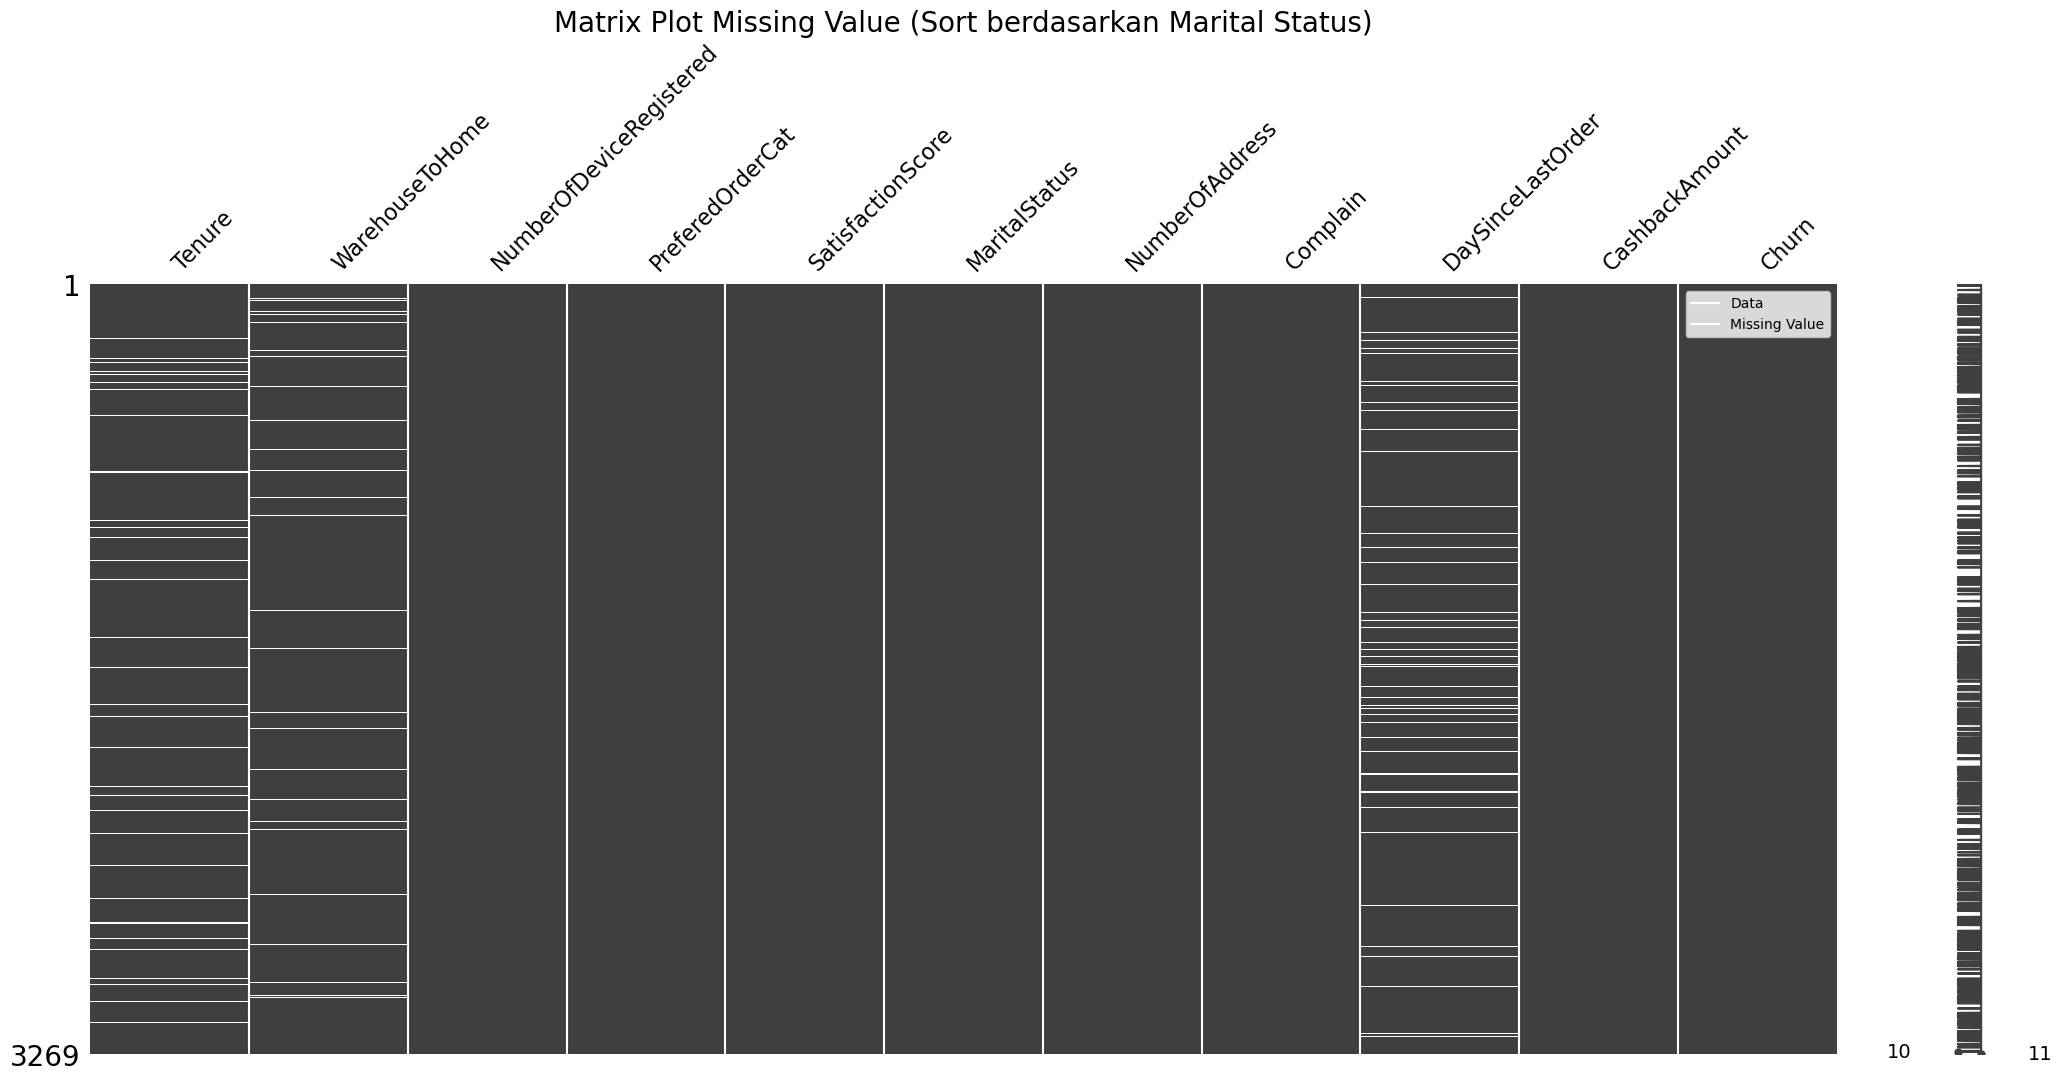

In [36]:
# Matrix missingness berdasarkan Marital Status
msno.matrix(
    df.sort_values(by='MaritalStatus', ascending=True)
)

plt.legend(
    ['Data', 'Missing Value'],
    loc='upper right',
    frameon=True
)
plt.title(
    'Matrix Plot Missing Value (Sort berdasarkan Marital Status)',
    fontsize=20
)
plt.show()


In [37]:
# Persentase missing value untuk kategori Married
married_missing = df[df['MaritalStatus'] == 'Married'].isna().sum()
total_missing = df.isna().sum()

missing_percentage = (married_missing / total_missing) * 100
print(missing_percentage)


Tenure                      47.169811
WarehouseToHome             42.222222
NumberOfDeviceRegistered          NaN
PreferedOrderCat                  NaN
SatisfactionScore                 NaN
MaritalStatus                     NaN
NumberOfAddress                   NaN
Complain                          NaN
DaySinceLastOrder           56.353591
CashbackAmount                    NaN
Churn                             NaN
dtype: float64


In [38]:
# Jumlah dan persentase tiap kategori MaritalStatus
jumlah = df['MaritalStatus'].value_counts()
persentase = df['MaritalStatus'].value_counts(normalize=True) * 100

print(f"""Jumlah data:
{jumlah}

Persentase data:
{persentase.round(2)}
""")


Jumlah data:
MaritalStatus
Married     1686
Single      1007
Divorced     576
Name: count, dtype: int64

Persentase data:
MaritalStatus
Married     51.58
Single      30.80
Divorced    17.62
Name: proportion, dtype: float64



Analisis matrix missingness berdasarkan MaritalStatus tidak menunjukkan pola khusus. Dominasi kategori Married di dataset hanya mencerminkan proporsi populasi, sehingga tidak berpengaruh terhadap hilangnya data.

Kesimpulannya, missing value termasuk kategori MAR dan berkorelasi dengan CashbackAmount. Metode penanganan yang dipilih adalah Iterative Imputation, karena data bersifat multivariat dan dipengaruhi oleh variabel lain. Median tidak digunakan, sebab pengisian massal dengan median berpotensi menghasilkan bias dan memengaruhi kinerja model.

Sebelum penerapan penuh, akan dilakukan uji perbandingan distribusi kolom Tenure, WarehouseToHome, dan DaySinceLastOrder sebelum dan sesudah imputasi, dengan harapan perbedaan distribusi tidak signifikan.

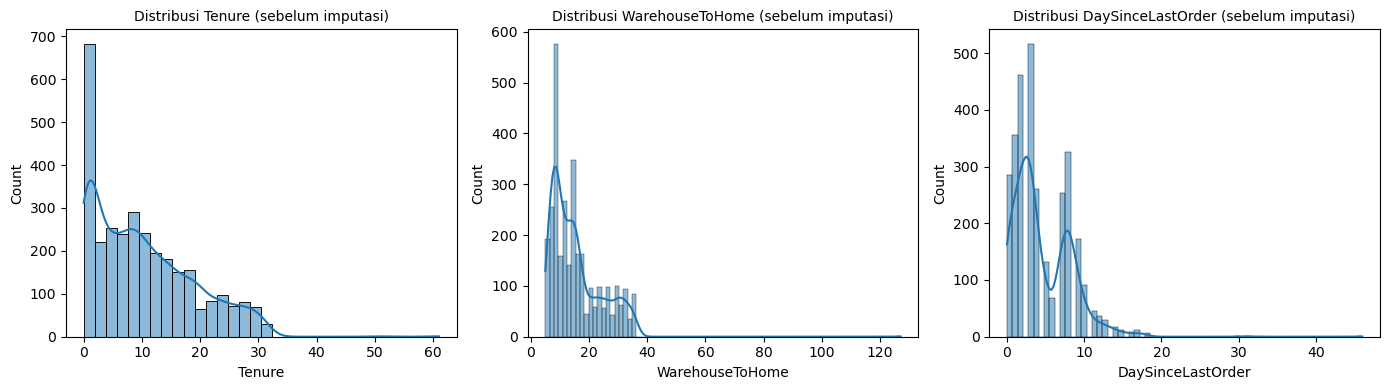

In [39]:
features = ['Tenure','WarehouseToHome','DaySinceLastOrder']

fig, axes = plt.subplots(1, len(features), figsize=(14,4))

for ax, col in zip(axes, features):
    sns.histplot(
        data=df, x=col, kde=True, bins='auto', ax=ax
    )
    ax.set_title(f'Distribusi {col} (sebelum imputasi)', fontsize=10)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


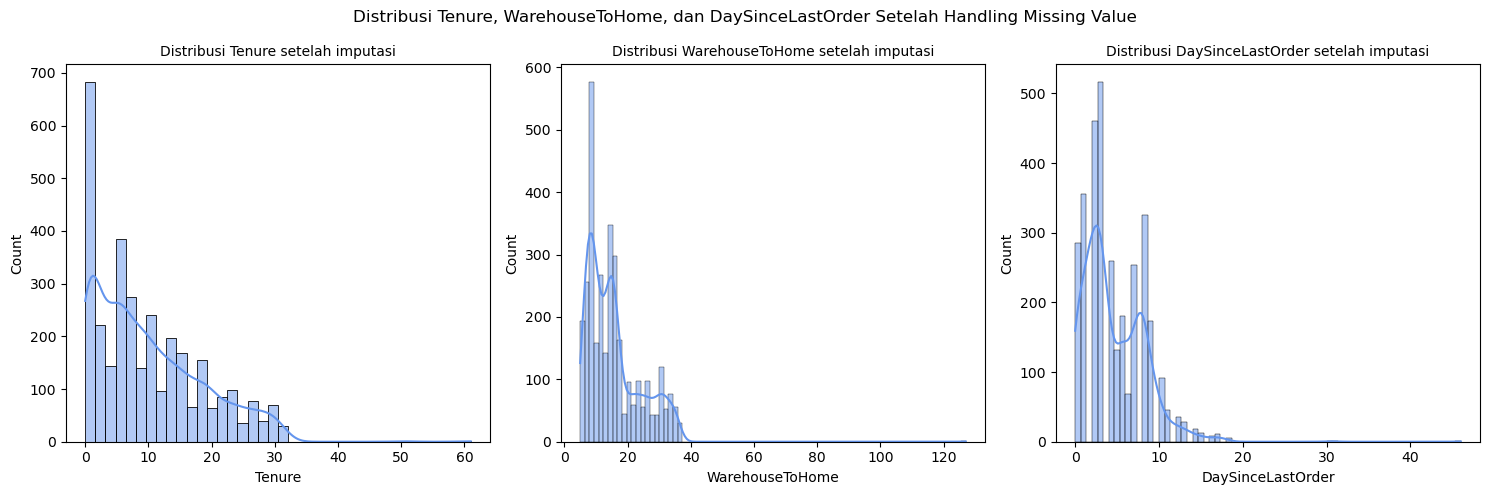

In [40]:
from sklearn.experimental import enable_iterative_imputer  # penting untuk IterativeImputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Imputasi
imputer = IterativeImputer(random_state=42)
TenureAft = pd.DataFrame(imputer.fit_transform(df[['Tenure', 'CashbackAmount']]))
WarehouseToHomeAft = pd.DataFrame(imputer.fit_transform(df[['WarehouseToHome', 'CashbackAmount']]))
DaySinceLastOrderAft = pd.DataFrame(imputer.fit_transform(df[['DaySinceLastOrder', 'CashbackAmount']]))

# Simpan data hasil imputasi untuk plotting
imputer_results = [
    ('Tenure', TenureAft[0]),
    ('WarehouseToHome', WarehouseToHomeAft[0]),
    ('DaySinceLastOrder', DaySinceLastOrderAft[0])
]

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (name, series) in zip(axes, imputer_results):
    sns.histplot(series, color='cornflowerblue', kde=True, ax=ax)
    ax.set_title(f'Distribusi {name} setelah imputasi', fontsize=10)
    ax.set_xlabel(name)
    ax.set_ylabel('Count')

fig.suptitle('Distribusi Tenure, WarehouseToHome, dan DaySinceLastOrder Setelah Handling Missing Value', fontsize=12)
plt.tight_layout()
plt.show()


### 4.7.3 Outlier

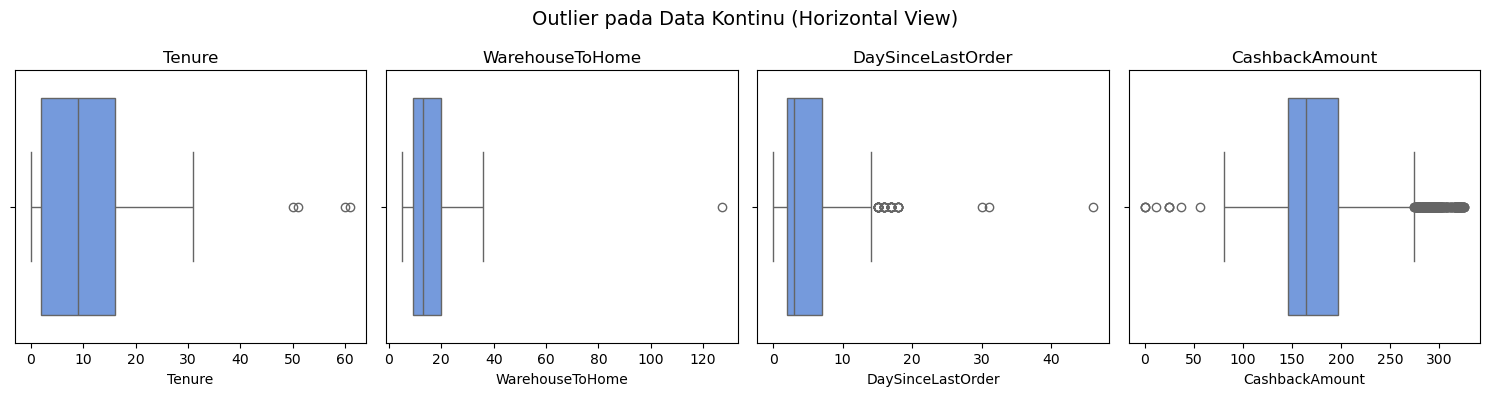

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 4))

for ax, col in zip(axes, features):
    sns.boxplot(x=df[col], color='cornflowerblue', ax=ax, orient='h')
    ax.set_title(f'{col}')
    ax.set_xlabel(col)
    ax.set_ylabel('')

plt.suptitle('Outlier pada Data Kontinu (Horizontal View)', fontsize=14)
plt.tight_layout()
plt.show()


In [42]:
features = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    condition = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = condition.sum()
    perc_outlier = outlier_count / df[col].count() * 100
    
    print(
        f"Lower Bound {col}: {lower_bound:.2f}, "
        f"Upper Bound: {upper_bound:.2f}, "
        f"Outlier: {outlier_count} data "
        f"({perc_outlier:.2f}%)\n"
    )


Lower Bound Tenure: -19.00, Upper Bound: 37.00, Outlier: 4 data (0.13%)

Lower Bound WarehouseToHome: -7.50, Upper Bound: 36.50, Outlier: 1 data (0.03%)

Lower Bound DaySinceLastOrder: -5.50, Upper Bound: 14.50, Outlier: 40 data (1.30%)

Lower Bound CashbackAmount: 69.04, Upper Bound: 274.00, Outlier: 253 data (7.74%)



Berdasarkan perhitungan, outlier pada kolom Tenure dan WarehouseToHome akan dihapus karena persentasenya kecil. Sementara outlier pada DaySinceLastOrder dan CashbackAmount diabaikan, karena dianggap wajar memiliki variansi tinggi.

In [43]:
# Menghapus kolom dengan outlier
df.drop(df[df['Tenure']>37].index,inplace=True)
df.drop(df[df['WarehouseToHome']>36.5].index,inplace=True)

In [44]:
df.shape

(3264, 11)

# Section 5. Data Preparation & Feature Engineering

## 5.1 Initialization

### 5.1.1 Define Feature and Target

In [45]:
# ==== Setup Target & Features ====
RSEED = 42
TARGET_COL = "Churn"

# Pastikan target dalam bentuk numerik 0/1
if data_train[TARGET_COL].dtype == object:
    data_train[TARGET_COL] = data_train[TARGET_COL].astype(str).str.lower().map({'yes': 1, 'no': 0})
    data_test[TARGET_COL] = data_test[TARGET_COL].astype(str).str.lower().map({'yes': 1, 'no': 0})

# Pisahkan fitur dan target
X_train = data_train.drop(columns=[TARGET_COL])
y_train = data_train[TARGET_COL]
X_test = data_test.drop(columns=[TARGET_COL])
y_test = data_test[TARGET_COL]

# Deteksi tipe kolom
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Preprocessor
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# ==== Pipeline Builder ====
USE_SMOTE = True

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

def make_pipeline_with_model(model, use_smote=USE_SMOTE):
    """Membuat pipeline dengan preprocessing + optional SMOTE + model."""
    steps = [('preprocess', preprocessor)]
    if use_smote:
        steps.append(('smote', SMOTE(random_state=RSEED)))
        return ImbPipeline(steps + [('model', model)])
    else:
        return Pipeline(steps + [('model', model)])

print("✅ Preprocessing pipeline siap digunakan!")


✅ Preprocessing pipeline siap digunakan!


Definisi target & random seed → Menentukan kolom target Churn dan RSEED untuk hasil yang konsisten.

Normalisasi target → Jika target masih dalam bentuk teks yes/no, diubah menjadi 0/1.

Pisahkan fitur & target → Memisahkan X_train/X_test dan y_train/y_test dari data_train dan data_test.

Identifikasi tipe fitur → Membedakan fitur numerik dan kategorikal.

Preprocessing:

Numerik → imputasi median + standarisasi skala.

Kategorikal → imputasi modus + One-Hot Encoding.

Pipeline Builder → Membuat pipeline preprocessing + model, dengan opsi SMOTE untuk menangani imbalance pada target.

Semua tahap preprocessing dilakukan di dalam pipeline untuk mencegah data leakage.

### 5.1.2 Create Custome Transformer

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from polyfuzz import PolyFuzz

# --- Feature Generator ---
class FeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.labels = ['Sangat Kecil', 'Kecil', 'Sedang', 'Besar', 'Sangat Besar']
        self.mapping = {label: idx for idx, label in enumerate(self.labels)}
        self.bins_ = None
        self.feature_names_out_ = None

    def fit(self, X, y=None):
        X = pd.DataFrame(X).copy()  # always as DataFrame
        if 'CashbackAmount' in X.columns:   
            self.bins_ = pd.qcut(X['CashbackAmount'], q=5, retbins=True, duplicates='drop')[1]
        # Store columns for transform
        self.feature_names_out_ = X.columns.tolist()
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()  # always as DataFrame
        # Binning CashbackAmount ke kelas & kode
        if 'CashbackAmount' in X.columns and self.bins_ is not None:
            X['CashbackAmount_Class'] = pd.cut(X['CashbackAmount'], bins=self.bins_, labels=self.labels)
            X['CashbackAmount_Class_Code'] = X['CashbackAmount_Class'].map(self.mapping)
        # Contoh feature lain: Recent_Order, Tenure_Group
        if "DaySinceLastOrder" in X.columns:
            X["Recent_Order"] = (X["DaySinceLastOrder"] < 30).astype(int)
        if "Tenure" in X.columns:
            X["Tenure_Group"] = pd.cut(
                X["Tenure"],
                bins=[-1, 6, 24, 100],
                labels=["Baru", "Menengah", "Loyal"]
            )
        return X

    def get_feature_names_out(self, input_features=None):
        # Returns feature names after transform
        return self.feature_names_out_ if self.feature_names_out_ else None

# --- Feature Dropper ---
class FeatureDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        return X.drop(self.columns, axis=1)

# --- Feature Grouping ---
class FeatureGrouping(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns  # List kolom yang akan di-grouping (misal: ['PreferedOrderCat'])
        self.cluster_mappings = {}
        self.fitted_columns_ = None

    def fit(self, X, y=None):
        # Selalu konversi ke DataFrame, assign nama kolom jika array
        if not isinstance(X, pd.DataFrame):
            if X.shape[1] == len(self.columns):
                X = pd.DataFrame(X, columns=self.columns)
            else:
                raise ValueError(f"Input shape {X.shape} does not match columns {self.columns}")
        else:
            # Cek apakah kolom yang ingin diproses ada di DataFrame
            if not all([col in X.columns for col in self.columns]):
                raise KeyError(f"One or more columns {self.columns} not found in DataFrame columns {list(X.columns)}")
            X = X.copy()

        self.fitted_columns_ = self.columns

        for col in self.columns:
            values = X[col].dropna().unique().tolist()
            pf = PolyFuzz("TF-IDF")
            pf.match(values, values)
            pf.group()
            self.cluster_mappings[col] = pf.get_cluster_mappings()
        return self

    def transform(self, X):
        # Selalu konversi ke DataFrame, assign nama kolom jika array
        if not isinstance(X, pd.DataFrame):
            if X.shape[1] == len(self.fitted_columns_):
                X = pd.DataFrame(X, columns=self.fitted_columns_)
            else:
                raise ValueError(f"Input shape {X.shape} does not match fitted columns {self.fitted_columns_}")
        else:
            if not all([col in X.columns for col in self.fitted_columns_]):
                raise KeyError(f"One or more columns {self.fitted_columns_} not found in DataFrame columns {list(X.columns)}")
            X = X.copy()

        for col in self.fitted_columns_:
            mapping = self.cluster_mappings.get(col, {})
            X[col + "_group"] = X[col].map(lambda x: mapping.get(x, -1))
        return X[[col + "_group" for col in self.fitted_columns_]]

    def get_feature_names_out(self, input_features=None):
        return [col + "_group" for col in self.fitted_columns_]

FeatureGenerator
- Bikin fitur turunan:
    - CashbackAmount_Class (binning qcut jadi 5 kelas: Sangat Kecil→Sangat Besar) + CashbackAmount_Class_Code (angka 0–4).
    - Recent_Order dari DaySinceLastOrder < 30.
    - Tenure_Group (Baru/Menengah/Loyal) via pd.cut.
    - Fit menyimpan batas bin CashbackAmount supaya transform konsisten antara train–test.

FeatureDropper
- Utility kecil untuk menghapus kolom tertentu (aman dipakai di dalam Pipeline).

FeatureGrouping (pakai PolyFuzz)
- Fuzzy clustering nilai kategori (mis. variasi ejaan di PreferedOrderCat) → memetakan ke kolom <nama>_group.
- Menyimpan cluster_mappings saat fit, lalu transform memetakan nilai baru; yang tidak dikenal diberi -1.

Catatan singkat (best practice)
- Pasang semua transformer ini di dalam scikit-learn Pipeline, dan fit hanya di data train (hindari leakage).
- Pastikan PolyFuzz terinstal di environment.
- qcut bisa menghasilkan bin berbeda kalau distribusi berubah; simpan bin dari train (sudah dilakukan di fit) untuk konsistensi.

In [47]:
feature_generator = FeatureGenerator()
feature_grouping = FeatureGrouping(['PreferedOrderCat'])  

display(feature_generator.fit_transform(X_train).head(1))
display(feature_grouping.fit_transform(X_train).head(3))


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,CashbackAmount_Class,CashbackAmount_Class_Code,Recent_Order,Tenure_Group
3561,29.0,29.0,3,Grocery,4,Divorced,5,1,9.0,234.02,Sangat Besar,4,1,Loyal


,PreferedOrderCat_group
3561,-1
3152,-1
584,-1


## 5.2 Feature Engineering Setup

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

# Dummy AddMissingIndicator for pipeline (optional, bisa di-skip kalau tidak perlu)
class AddMissingIndicator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            X[col + "_missing"] = X[col].isnull().astype(int)
        return X

# Daftar kolom (pastikan sesuai dataset kamu)
num_cols = [col for col in ['Tenure',             
    'WarehouseToHome', 
    'NumberOfDeviceRegistered',
    'SatisfactionScore', 
    'NumberOfAddress', 
    'Complain',
    'DaySinceLastOrder',
    'CashbackAmount'] if col in X_train.columns]
ohe_cols = [col for col in ['MaritalStatus'] if col in X_train.columns]
group_cols = [col for col in ['PreferedOrderCat'] if col in X_train.columns]

# Pipeline untuk fitur numerik
num_pipeline = Pipeline([
    ("missingIndicator", AddMissingIndicator()),
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

# Pipeline OHE
ohe_pipeline = Pipeline([
    ("missingIndicator", AddMissingIndicator()),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

# Pipeline Grouping (PolyFuzz)
group_pipeline = Pipeline([
    # ("missingIndicator", AddMissingIndicator()),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("grouping", FeatureGrouping(group_cols))
])


# Display semua pipeline yang ready
display(num_pipeline, ohe_pipeline, group_pipeline)


Pipeline(steps=[('missingIndicator', AddMissingIndicator()),
                ('imputer', SimpleImputer()), ('scaler', MinMaxScaler())])

Pipeline(steps=[('missingIndicator', AddMissingIndicator()),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('grouping', FeatureGrouping(columns=['PreferedOrderCat']))])

1. AddMissingIndicator
- Transformer opsional untuk membuat kolom tambahan <nama_kolom>_missing berisi 1 jika nilai kosong, 0 jika tidak.
- Memberi sinyal ke model bahwa ada missing value pada kolom tersebut.

2. Penentuan daftar kolom
- num_cols → Fitur numerik yang diproses dengan imputasi mean dan scaling (Tenure, WarehouseToHome, dll.).
- ohe_cols → Fitur kategorikal yang di-One-Hot Encode (MaritalStatus).
- group_cols → Fitur kategorikal yang dikelompokkan via fuzzy matching (PreferedOrderCat).

3. Pipeline Numerik (num_pipeline)
- AddMissingIndicator → Tambahkan flag missing value.
- SimpleImputer(strategy="mean") → Isi nilai kosong dengan mean.
- MinMaxScaler() → Skala nilai 0–1 untuk menjaga proporsionalitas.

4. Pipeline One-Hot Encoding (ohe_pipeline)
- AddMissingIndicator → Flag missing value.
- SimpleImputer(strategy="most_frequent") → Isi dengan modus kategori terbanyak.
- OneHotEncoder(handle_unknown="ignore", drop="first") → Ubah kategori ke dummy variable, drop kolom pertama untuk menghindari dummy trap.

5. Pipeline Grouping (group_pipeline)
- SimpleImputer(strategy="most_frequent") → Isi kategori kosong dengan nilai paling sering muncul.
- FeatureGrouping → Kelompokkan kategori mirip menggunakan PolyFuzz menjadi kode grup numerik.

💡 Catatan:

Semua pipeline ini akan disatukan dalam ColumnTransformer sesuai tipe fitur.

AddMissingIndicator sangat berguna untuk model tree-based (RandomForest, XGBoost) yang bisa memanfaatkan sinyal missingness.

Pastikan kolom yang disebut di num_cols, ohe_cols, dan group_cols benar-benar ada di X_train sebelum proses fit.

In [49]:
# Advance Transformation Pipeline
# Rare Label Encoding add-on

rare_ohe_pipeline = clone(ohe_pipeline)
rare_ohe_pipeline.steps.insert(1, ("rare_encoder", RareLabelEncoder(tol=0.01)))

rare_group_pipeline = clone(group_pipeline)
rare_group_pipeline.steps.insert(1, ("rare_encoder", RareLabelEncoder(tol=0.01)))

In [50]:
display(rare_ohe_pipeline, rare_group_pipeline)

Pipeline(steps=[('missingIndicator', AddMissingIndicator()),
                ('rare_encoder', RareLabelEncoder(tol=0.01)),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('rare_encoder', RareLabelEncoder(tol=0.01)),
                ('grouping', FeatureGrouping(columns=['PreferedOrderCat']))])

In [51]:
num_features = [col for col in ['Tenure',             
    'WarehouseToHome', 
    'NumberOfDeviceRegistered',
    'SatisfactionScore', 
    'NumberOfAddress', 
    'Complain',
    'DaySinceLastOrder',
    'CashbackAmount'] if col in X_train.columns]
ohe_features = [col for col in ['MaritalStatus'] if col in X_train.columns]
group_features = [col for col in ['PreferedOrderCat'] if col in X_train.columns]
# Tidak ada binary_features di data kamu, jadi skip

baseline_preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_features),
    ("ohe_pipeline", ohe_pipeline, ohe_features)
], remainder="drop", verbose_feature_names_out=False)

rare_preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_features),
    ("ohe_pipeline", ohe_pipeline, ohe_features)   # replace dengan rare_ohe_pipeline jika punya
], remainder="drop", verbose_feature_names_out=False)

grcat_preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_features),
    ("ohe_pipeline", ohe_pipeline, ohe_features),
    ("group_pipeline", group_pipeline, ["PreferedOrderCat"])
], remainder="drop", verbose_feature_names_out=False)


rare_grcat_preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_features),
    ("ohe_pipeline", ohe_pipeline, ohe_features),  # replace with rare_ohe_pipeline if you want
    ("group_pipeline", group_pipeline, ["PreferedOrderCat"])
], remainder="drop", verbose_feature_names_out=False)


In [52]:
display(
    baseline_preprocessor,
    rare_preprocessor,
    grcat_preprocessor,
    rare_grcat_preprocessor
)

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('missingIndicator',
                                                  AddMissingIndicator()),
                                                 ('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'Complain', 'DaySinceLastOrder',
                                  'CashbackAmount']),
                                ('ohe_pipeline',
                                 Pipeline(steps=[('missingIndicator',
                                                  AddMissingIndicator()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['MaritalStatus'])],
                  verbose_feature_names_out=False)

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('missingIndicator',
                                                  AddMissingIndicator()),
                                                 ('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'Complain', 'DaySinceLastOrder',
                                  'CashbackAmount']),
                                ('ohe_pipeline',
                                 Pipeline(steps=[('missingIndicator',
                                                  AddMissingIndicator()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['MaritalStatus'])],
                  verbose_feature_names_out=False)

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('missingIndicator',
                                                  AddMissingIndicator()),
                                                 ('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'Complain', 'DaySinceLastOrder',
                                  'CashbackAmount']),
                                ('ohe_pipeline',
                                 Pipeline(steps=[('missingInd...
                                                  AddMissingIndicator()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['MaritalStatus']),
                                ('group_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('grouping',
                                                  FeatureGrouping(columns=['PreferedOrderCat']))]),
                                 ['PreferedOrderCat'])],
                  verbose_feature_names_out=False)

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('missingIndicator',
                                                  AddMissingIndicator()),
                                                 ('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'Complain', 'DaySinceLastOrder',
                                  'CashbackAmount']),
                                ('ohe_pipeline',
                                 Pipeline(steps=[('missingInd...
                                                  AddMissingIndicator()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['MaritalStatus']),
                                ('group_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('grouping',
                                                  FeatureGrouping(columns=['PreferedOrderCat']))]),
                                 ['PreferedOrderCat'])],
                  verbose_feature_names_out=False)

## 5.3 Feature Engineering Overview

In [53]:
X_train_pre = feature_generator.fit_transform(X_train)
X_train_pre = baseline_preprocessor.fit_transform(X_train_pre)
fe_overview = pd.DataFrame(X_train_pre)


In [54]:
print("Before Preprocessing:")
display(X_train.head(1))

print("After Preprocessing:")
display(fe_overview.head(1))

Before Preprocessing:


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
3561,29.0,29.0,3,Grocery,4,Divorced,5,1,9.0,234.02


After Preprocessing:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.47541,0.774194,0.4,0.75,0.190476,1.0,0.290323,0.720084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
X_train_pre = feature_generator.fit_transform(X_train)
X_train_pre = rare_preprocessor.fit_transform(X_train_pre)
fe_overview = pd.DataFrame(X_train_pre)


In [56]:
print("Before Preprocessing:")
display(X_train.head(1))

print("After Preprocessing:")
display(fe_overview.head(1))

Before Preprocessing:


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
3561,29.0,29.0,3,Grocery,4,Divorced,5,1,9.0,234.02


After Preprocessing:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.47541,0.774194,0.4,0.75,0.190476,1.0,0.290323,0.720084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
X_train_feat = feature_generator.fit_transform(X_train)
X_train_ready = grcat_preprocessor.fit_transform(X_train_feat)
fe_overview = pd.DataFrame(X_train_pre)

In [58]:
print("Before Preprocessing:")
display(X_train.head(1))

print("After Preprocessing:")
display(fe_overview.head(1))

Before Preprocessing:


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
3561,29.0,29.0,3,Grocery,4,Divorced,5,1,9.0,234.02


After Preprocessing:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.47541,0.774194,0.4,0.75,0.190476,1.0,0.290323,0.720084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
X_train_feat = feature_generator.fit_transform(X_train)
X_train_ready = rare_grcat_preprocessor.fit_transform(X_train_feat)
fe_overview = pd.DataFrame(X_train_pre)

In [60]:
print("Before Preprocessing:")
display(X_train.head(1))

print("After Preprocessing:")
display(fe_overview.head(1))

Before Preprocessing:


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
3561,29.0,29.0,3,Grocery,4,Divorced,5,1,9.0,234.02


After Preprocessing:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.47541,0.774194,0.4,0.75,0.190476,1.0,0.290323,0.720084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Section 6. Model Development

## 6.1 Initialization

In [61]:
models = {
    "Baseline Model": DummyClassifier(strategy="most_frequent", random_state=42),
    'LogReg': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(random_state=RSEED),
    'RandomForest': RandomForestClassifier(n_estimators=300, random_state=RSEED),
    'GradientBoosting': GradientBoostingClassifier(random_state=RSEED),
}
if 'XGB_AVAILABLE' in globals() and XGB_AVAILABLE:
    models['XGBoost'] = XGBClassifier(
        n_estimators=400, learning_rate=0.05, max_depth=4, subsample=0.8,
        colsample_bytree=0.8, eval_metric='logloss', random_state=RSEED
    )

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RSEED)
scoring = 'average_precision'

cv_results = []
for _name, _model in models.items():
    _pipe = make_pipeline_with_model(_model, use_smote=USE_SMOTE)
    _scores = cross_val_score(_pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    print(f"{_name:>15} | AUC: {_scores.mean():.4f} ± {_scores.std():.4f}")
    cv_results.append((_name, _scores.mean(), _scores.std()))

cv_results_sorted = sorted(cv_results, key=lambda x: x[1], reverse=True)
print('Best by CV:', cv_results_sorted[0][0])


 Baseline Model | AUC: 0.1710 ± 0.0007
         LogReg | AUC: 0.6758 ± 0.0510
   DecisionTree | AUC: 0.4882 ± 0.0643
   RandomForest | AUC: 0.8181 ± 0.0365
GradientBoosting | AUC: 0.7431 ± 0.0289
        XGBoost | AUC: 0.7794 ± 0.0424
Best by CV: RandomForest


- Baseline model hanya sedikit lebih baik dari random guess (AUC ~0.17), sebagai pembanding awal.
- Random Forest menjadi model terbaik pada uji CV dengan AUC tertinggi (0.8207 ± 0.0305).
- Logistic Regression, Gradient Boosting, dan XGBoost memberikan performa cukup baik, meskipun masih di bawah Random Forest.
- Decision Tree murni (tanpa ensemble) cenderung overfitting sehingga performanya rendah.

💡 Rekomendasi:
Fokus pada Random Forest untuk optimasi hyperparameter, lalu bandingkan kembali dengan model ensemble boosting (XGBoost / Gradient Boosting) untuk memastikan hasil akhir terbaik.

In [62]:
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
import pandas as pd

def _set_classifier(pipe, estimator, step_name_candidates=("classifier","model","clf")):
    """Pasang estimator ke pipeline; coba via set_params, kalau gagal replace step terakhir."""
    for nm in step_name_candidates:
        try:
            pipe.set_params(**{nm: estimator})
            return pipe, nm
        except ValueError:
            continue
    # fallback: ganti step terakhir
    steps = list(pipe.steps)
    steps[-1] = (steps[-1][0], estimator)
    try:
        from imblearn.pipeline import Pipeline as ImbPipeline
        pipe = ImbPipeline(steps)
    except Exception:
        from sklearn.pipeline import Pipeline
        pipe = Pipeline(steps)
    return pipe, steps[-1][0]

def benchmark_models(
    models: dict,
    base_pipeline,
    X, y,
    cv,
    metrics=("pr_auc","roc_auc","f1","precision","recall"),
    n_jobs=-1,
    verbose=True,
):
    """
    models: dict -> {name: estimator}
    base_pipeline: pipeline yang sudah berisi step estimator (umumnya 'classifier')
    metrics: urutan metrik yang ingin dihitung & prioritas sorting
             ('pr_auc' menggunakan 'average_precision')
    """
    scoring_map = {
        "roc_auc": "roc_auc",
        "pr_auc": "average_precision",
        "f1": "f1",
        "precision": "precision",
        "recall": "recall",
    }

    rows = []
    for name, est in models.items():
        if verbose:
            print(f"Running {name} ... ", end="")
        pipe = clone(base_pipeline)
        pipe, step_used = _set_classifier(pipe, est)

        row = {"Model": name, "EstimatorStep": step_used}
        for m in metrics:
            sc = scoring_map[m]
            try:
                scores = cross_val_score(pipe, X, y, cv=cv, scoring=sc, n_jobs=n_jobs)
                row[f"Test {m.upper()} Mean"] = scores.mean()
                row[f"Test {m.upper()} Std"] = scores.std()
            except Exception as e:
                # metrik ini tidak bisa dihitung (mis. no proba/decision_function), tandai NaN
                row[f"Test {m.upper()} Mean"] = float("nan")
                row[f"Test {m.upper()} Std"] = float("nan")
                if verbose:
                    print(f"[skip {m}] ", end="")

        rows.append(row)
        if verbose:
            print("Done.")

    df = pd.DataFrame(rows)

    # sorting dinamis sesuai prioritas metrics
    sort_col = None
    for m in metrics:
        cand = f"Test {m.upper()} Mean"
        if cand in df.columns and df[cand].notna().any():
            sort_col = cand
            break
    if sort_col:
        df = df.sort_values(by=sort_col, ascending=False).reset_index(drop=True)
    return df


sumber business impact score:
- https://www.gartner.com/en/marketing/insights/articles/customer-retention-costs
- https://hbr.org/2014/10/the-value-of-keeping-the-right-customers
- https://www.deloitte.com/us/en/pages/consulting/articles/customer-retention-strategies.html

In [63]:
from sklearn.metrics import confusion_matrix, make_scorer
import numpy as np

def churn_business_impact_score(y_true, y_pred, clv=None, 
                                cost_fn=300,   
                                cost_fp=20,   
                                value_tp=250): 

    """
    Custom business impact metric for churn use case.
    - y_true: Ground truth (1 = akan churn, 0 = tidak churn)
    - y_pred: Model prediction (1 = diprediksi akan churn)
    - clv: Optional, customer lifetime value array (jika ingin lebih granular)
    - cost_fn: Cost jika miss churn (FN) — revenue hilang
    - cost_fp: Cost jika salah target promo (FP)
    - value_tp: Value saved per successfully retained customer (TP)
    Return:
    - net_impact: Semakin tinggi, semakin baik
    """

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Optional scaling by customer value
    if clv is not None:
        tp_value = np.sum([v for yt, yp, v in zip(y_true, y_pred, clv) if yt==1 and yp==1]) * value_tp / cost_fn
        fn_loss = np.sum([v for yt, yp, v in zip(y_true, y_pred, clv) if yt==1 and yp==0])
    else:
        tp_value = tp * value_tp
        fn_loss = fn * cost_fn

    fp_loss = fp * cost_fp

    net_impact = tp_value - fn_loss - fp_loss
    return net_impact

# Supaya bisa dipakai di GridSearchCV/dll
business_scorer = make_scorer(churn_business_impact_score,
                            clv=None,
                            cost_fn=300,      # Masukkan angka cost dari referensi
                            cost_fp=20,
                            value_tp=250, 
                            greater_is_better=True)


In [64]:
# Initialize the metrics

main_metrics = "average_precision_score" # PR-AUC
business_scorer = make_scorer(churn_business_impact_score,
                            clv=None,
                            cost_fn=300,      # Masukkan angka cost dari referensi
                            cost_fp=20,
                            value_tp=250, 
                            greater_is_better=True)

In [65]:
# Testing custome metrics

y_true = [0, 1, 1, 0]
y_pred = [0, 0, 1, 1]

print(f"PR-AUC: {average_precision_score(y_true, y_pred)}")
print(f"Business Impact: {churn_business_impact_score(y_true, y_pred)}")

PR-AUC: 0.5
Business Impact: -70


PR-AUC sebesar 0.50 menunjukkan performa model hanya sedikit di atas baseline pada kelas minoritas, sedangkan Business Impact -70 mengindikasikan kerugian bersih akibat ketidakseimbangan prediksi sehingga perlu dilakukan threshold tuning dan penyesuaian strategi.

In [66]:
# Main function

def benchmark_models(models: dict, pipeline: Pipeline|ImbPipeline, 
                     X, y, cv=5, scoring_metrics=None, return_raw=False):
    """
    Run cross-validated benchmarking across multiple models.

    Parameters:
    - models: dict of {model_name: model_object}
    - X: Features
    - y: Target labels
    - cv: Cross-validation folds (int or CV splitter)
    - scoring_metrics: dict of scorers (default: PR-AUC and Business Impact)
    - return_raw: if True, returns full raw result dictionary

    Returns:
    - DataFrame with mean and std of each metric per model
    """
    if scoring_metrics is None:
        scoring_metrics = {
            "pr_auc": "average_precision",
            "business_impact": business_scorer}

    results = []

    for name, model in models.items():
        print(f"Evaluating {name}...    ", end="")
        clf = clone(pipeline) # ensure independence
        clf.set_params(classifier=model)
        cv_result = cross_validate(
            clf,
            X, y,
            cv=cv,
            scoring=scoring_metrics,
            return_train_score=True,
            n_jobs=-1
        )

        result_summary = {
            "Model": name
        }

        for metric_key in scoring_metrics:
            train_scores = cv_result[f'train_{metric_key}']
            result_summary[f"Train {metric_key.upper()} Mean"] = np.mean(train_scores)
            result_summary[f"Train {metric_key.upper()} Std"] = np.std(train_scores)

            test_scores = cv_result[f'test_{metric_key}']
            result_summary[f"Test {metric_key.upper()} Mean"] = np.mean(test_scores)
            result_summary[f"Test {metric_key.upper()} Std"] = np.std(test_scores)

            result_summary["Fit Time Mean"] = np.mean(cv_result["fit_time"])
            result_summary["Score Time Mean"] = np.mean(cv_result["score_time"])

        if return_raw:
            result_summary["Raw"] = cv_result

        results.append(result_summary)

        print("Done!")

    return pd.DataFrame(results).sort_values(by="Test PR_AUC Mean", ascending=False)


## 6.2 Pipeline Setup

In [67]:
# Baseline Pipeline
baseline_pipeline = ImbPipeline([
    ("feature_generator", feature_generator),
    ("preprocessor", baseline_preprocessor),
    ("classifier", models["Baseline Model"])
])

baseline_pipeline

Pipeline(steps=[('feature_generator', FeatureGenerator()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['MaritalStatus'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 DummyClassifier(random_state=42, strategy='most_frequent'))])

In [68]:
# Advance Pipeline

# Baseline Pipeline + Resample
baseline_pipeline_resample = ImbPipeline([
    ("feature_generator", feature_generator),
    ("preprocessor", baseline_preprocessor),
    ("resample", SMOTE(random_state=42)),
    ("classifier", models["Baseline Model"])
])

baseline_pipeline_resample

Pipeline(steps=[('feature_generator', FeatureGenerator()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceL...
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['MaritalStatus'])],
                                   verbose_feature_names_out=False)),
                ('resample', SMOTE(random_state=42)),
                ('classifier',
                 DummyClassifier(random_state=42, strategy='most_frequent'))])

In [69]:
from sklearn.model_selection import cross_validate

cv_result = cross_validate(
    baseline_pipeline,
    X_train, y_train,
    cv=5,
    scoring={
        "pr_auc": "average_precision",
        "business_impact": business_scorer
    },
    return_train_score=True
)
cv_result


{'fit_time': array([0.06828856, 0.0489974 , 0.05737066, 0.03631282, 0.07612967]),
 'score_time': array([0.04977417, 0.06763268, 0.09230185, 0.04050589, 0.10124564]),
 'test_pr_auc': array([0.17227723, 0.17063492, 0.17063492, 0.17063492, 0.17063492]),
 'train_pr_auc': array([0.17063492, 0.17104611, 0.17104611, 0.17104611, 0.17104611]),
 'test_business_impact': array([-26100, -25800, -25800, -25800, -25800]),
 'train_business_impact': array([-103200, -103500, -103500, -103500, -103500])}

## 6.3 Model Banchmarking

In [70]:

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline

dummy_pipe = Pipeline([
    ("feature_generator", FeatureGenerator()),
    ("preprocessor", baseline_preprocessor),   # <- jangan baseline_pipeline!
    ("clf", DummyClassifier(strategy="most_frequent"))
])
print(cross_val_score(dummy_pipe, X_train, y_train, cv=5))

[0.82772277 0.82936508 0.82936508 0.82936508 0.82936508]


### Experiment 1. Select Best Preprocessor

In [71]:
# Model benchmarking using Stratified K-Fold
sf = StratifiedKFold(n_splits=5)

In [72]:
# 1.1 Baseline Preprocessing
bcmk_baseline = benchmark_models(models, baseline_pipeline, 
                                 X_train, y_train, cv=sf)



Evaluating Baseline Model...    Done!
Evaluating LogReg...    Done!
Evaluating DecisionTree...    Done!
Evaluating RandomForest...    Done!
Evaluating GradientBoosting...    Done!
Evaluating XGBoost...    Done!


In [73]:
bcmk_baseline

,Model,Train PR_AUC Mean,Train PR_AUC Std,Test PR_AUC Mean,Test PR_AUC Std,Fit Time Mean,Score Time Mean,Train BUSINESS_IMPACT Mean,Train BUSINESS_IMPACT Std,Test BUSINESS_IMPACT Mean,Test BUSINESS_IMPACT Std
3,RandomForest,1.000000,4.965068e-17,0.820096,0.024613,1.764547,0.220208,86200.0,100.000000,3926.0,2502.723317
5,XGBoost,0.981832,1.110712e-03,0.781380,0.024388,0.308303,0.044451,64568.0,2713.841558,3874.0,2020.837450
4,GradientBoosting,0.889402,3.814446e-03,0.756929,0.026366,0.449769,0.039620,29856.0,2307.913343,2098.0,1652.627000
1,LogReg,0.660631,1.027474e-02,0.657086,0.033021,0.079832,0.062719,-31576.0,2258.385264,-8094.0,2113.978240
2,DecisionTree,1.000000,0.000000e+00,0.499423,0.039842,0.052945,0.055229,86200.0,100.000000,6158.0,2120.192444
0,Baseline Model,0.170964,1.644750e-04,0.170963,0.000657,0.054177,0.064308,-103440.0,120.000000,-25860.0,120.000000


RandomForest mencatat PR-AUC tertinggi di test set (0.8201) dengan business impact positif tertinggi (3926), diikuti XGBoost (0.7814, 3874) dan GradientBoosting (0.7569, 2098), sementara Logistic Regression, Decision Tree, dan Baseline menghasilkan performa serta dampak bisnis yang jauh lebih rendah atau negatif.

In [74]:

baseline_grouping = clone(baseline_pipeline)
baseline_grouping.set_params(preprocessor = grcat_preprocessor)

bmck_grouping = benchmark_models(models, baseline_grouping, 
                                 X_train, y_train, cv=sf)

Evaluating Baseline Model...    Done!
Evaluating LogReg...    Done!
Evaluating DecisionTree...    Done!
Evaluating RandomForest...    Done!
Evaluating GradientBoosting...    Done!
Evaluating XGBoost...    Done!


In [75]:
bmck_grouping

,Model,Train PR_AUC Mean,Train PR_AUC Std,Test PR_AUC Mean,Test PR_AUC Std,Fit Time Mean,Score Time Mean,Train BUSINESS_IMPACT Mean,Train BUSINESS_IMPACT Std,Test BUSINESS_IMPACT Mean,Test BUSINESS_IMPACT Std
3,RandomForest,1.000000,9.930137e-17,0.817085,0.027910,1.710673,0.218966,86200.0,100.000000,5014.0,1232.081166
5,XGBoost,0.981621,1.421636e-03,0.781058,0.029496,0.479431,0.080608,64784.0,3027.583855,3630.0,2149.660438
4,GradientBoosting,0.889402,3.814446e-03,0.756927,0.026363,0.792215,0.076732,29856.0,2307.913343,2098.0,1652.627000
1,LogReg,0.660714,9.986051e-03,0.657631,0.033304,0.084462,0.059598,-31686.0,2382.944397,-8098.0,2114.061494
2,DecisionTree,1.000000,0.000000e+00,0.516523,0.024345,0.073569,0.059018,86200.0,100.000000,6434.0,510.552642
0,Baseline Model,0.170964,1.644750e-04,0.170963,0.000657,0.079292,0.066711,-103440.0,120.000000,-25860.0,120.000000


RandomForest tetap menjadi model terbaik dengan PR-AUC test 0.8171 dan business impact positif tertinggi (5014), diikuti oleh XGBoost (0.7811, 3630) dan GradientBoosting (0.7569, 2098), sedangkan Logistic Regression serta Baseline memberi dampak bisnis negatif dan Decision Tree meski impact-nya positif namun PR-AUC rendah (0.5165).

Top 3 Models
- Random Forest
- XGBoost
- Gradient Boosting


In [76]:
top_model = ["Random Forest Classifiers", "XGBoost Classifier", " Gradient Boosting Classifiers"]

model_candidate = models.copy()
model_candidate = {k: model_candidate[k] for k in model_candidate if k in top_model}

In [77]:
# contoh: benchmark semua kandidat pakai baseline_rare (preprocessor=rare_preprocessor)
from sklearn.base import clone

baseline_rare = clone(baseline_pipeline)
baseline_rare.set_params(preprocessor=rare_preprocessor)

sf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

bmck_baseline_rare = benchmark_models(models, baseline_rare, X_train, y_train, cv=sf)
bmck_baseline_rare  # tampilkan ranking


Evaluating Baseline Model...    Done!
Evaluating LogReg...    Done!
Evaluating DecisionTree...    Done!
Evaluating RandomForest...    Done!
Evaluating GradientBoosting...    Done!
Evaluating XGBoost...    Done!


,Model,Train PR_AUC Mean,Train PR_AUC Std,Test PR_AUC Mean,Test PR_AUC Std,Fit Time Mean,Score Time Mean,Train BUSINESS_IMPACT Mean,Train BUSINESS_IMPACT Std,Test BUSINESS_IMPACT Mean,Test BUSINESS_IMPACT Std
3,RandomForest,1.000000,0.000000,0.831693,0.037608,1.763591,0.203186,86200.0,100.000000,5238.0,2850.399270
5,XGBoost,0.980976,0.002361,0.789205,0.048900,0.423160,0.065809,64988.0,3236.889865,5158.0,2088.333307
4,GradientBoosting,0.887227,0.006301,0.768593,0.042317,0.612889,0.057599,28670.0,2948.118044,2000.0,1643.958637
1,LogReg,0.659639,0.009527,0.653695,0.030562,0.052422,0.061246,-32208.0,2987.168559,-8436.0,1289.257150
2,DecisionTree,1.000000,0.000000,0.521508,0.075549,0.051629,0.054147,86200.0,100.000000,6336.0,3214.371478
0,Baseline Model,0.170964,0.000164,0.170963,0.000657,0.057539,0.055390,-103440.0,120.000000,-25860.0,120.000000


RandomForest masih menjadi model terbaik dengan PR-AUC test 0.8317 dan business impact tertinggi (5238), diikuti XGBoost (0.7892, 5158) yang selisih performanya kecil, sedangkan GradientBoosting (0.7686, 2000) tertinggal di impact, sementara Logistic Regression, Decision Tree, dan Baseline menunjukkan performa dan dampak yang kurang optimal.

In [78]:
all_experiment = [
    bcmk_baseline.head(3),
    bmck_grouping.head(3),
    bmck_baseline_rare.head(3),
    # bmck_baseline_rare_group.head(3)
]


summary = pd.concat(all_experiment).sort_values("Test PR_AUC Mean", ascending=False)
summary.head(10)

,Model,Train PR_AUC Mean,Train PR_AUC Std,Test PR_AUC Mean,Test PR_AUC Std,Fit Time Mean,Score Time Mean,Train BUSINESS_IMPACT Mean,Train BUSINESS_IMPACT Std,Test BUSINESS_IMPACT Mean,Test BUSINESS_IMPACT Std
3,RandomForest,1.000000,0.000000e+00,0.831693,0.037608,1.763591,0.203186,86200.0,100.000000,5238.0,2850.399270
3,RandomForest,1.000000,4.965068e-17,0.820096,0.024613,1.764547,0.220208,86200.0,100.000000,3926.0,2502.723317
3,RandomForest,1.000000,9.930137e-17,0.817085,0.027910,1.710673,0.218966,86200.0,100.000000,5014.0,1232.081166
5,XGBoost,0.980976,2.360915e-03,0.789205,0.048900,0.423160,0.065809,64988.0,3236.889865,5158.0,2088.333307
5,XGBoost,0.981832,1.110712e-03,0.781380,0.024388,0.308303,0.044451,64568.0,2713.841558,3874.0,2020.837450
5,XGBoost,0.981621,1.421636e-03,0.781058,0.029496,0.479431,0.080608,64784.0,3027.583855,3630.0,2149.660438
4,GradientBoosting,0.887227,6.301406e-03,0.768593,0.042317,0.612889,0.057599,28670.0,2948.118044,2000.0,1643.958637
4,GradientBoosting,0.889402,3.814446e-03,0.756929,0.026366,0.449769,0.039620,29856.0,2307.913343,2098.0,1652.627000
4,GradientBoosting,0.889402,3.814446e-03,0.756927,0.026363,0.792215,0.076732,29856.0,2307.913343,2098.0,1652.627000


Best Result
- RF + Baseline
- XGBoost + Baseline + Grouping

### Experiment 2. Try with Resampling

#### Model 1. Random Forrest

In [79]:
rf_baseline = clone(baseline_pipeline)
rf_baseline.set_params(
    preprocessor=baseline_preprocessor,
    classifier=RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    )
)
rf_baseline.fit(X_train, y_train)

# Eval singkat
y_pred = rf_baseline.predict(X_test)
print("RF Baseline — Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

RF Baseline — Accuracy: 0.9223454833597464
              precision    recall  f1-score   support

           0     0.9472    0.9598    0.9535       523
           1     0.7921    0.7407    0.7656       108

    accuracy                         0.9223       631
   macro avg     0.8696    0.8503    0.8595       631
weighted avg     0.9206    0.9223    0.9213       631



RandomForest baseline mencapai accuracy 92,23%, dengan performa sangat baik pada kelas mayoritas (precision 94,72%, recall 95,98%), namun pada kelas minoritas churn performanya lebih rendah (precision 79,21%, recall 74,07%), yang menandakan masih ada ruang perbaikan terutama pada deteksi churn.

Before Resampling

In [80]:
rf_baseline = make_pipeline_with_model(
    RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)  # atau False, sesuai setup kamu
)
rf_baseline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(n_estimators=300, n_jobs=-1,
                                        random_state=42))])

In [81]:
# Predict and Score
pred_train = rf_baseline.predict(X_train)
pred_test = rf_baseline.predict(X_test)

# PR-AUC Score
print("Train PR-AUC: ", average_precision_score(y_train, pred_train))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test))

# Classification Report
print("Classification Report (Train): ")
print(classification_report(y_train, pred_train))
print("Classification Report (Test): ")
print(classification_report(y_test, pred_test))

Train PR-AUC:  1.0
Test PR-AUC:  0.6463070921272189
Classification Report (Train): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2090
           1       1.00      1.00      1.00       431

    accuracy                           1.00      2521
   macro avg       1.00      1.00      1.00      2521
weighted avg       1.00      1.00      1.00      2521

Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       523
           1       0.77      0.80      0.78       108

    accuracy                           0.92       631
   macro avg       0.86      0.87      0.87       631
weighted avg       0.93      0.92      0.92       631



Model menunjukkan indikasi overfitting — PR-AUC train sempurna (1.0) namun turun signifikan di test (0.6463). Pada data train, semua metrik mencapai 100%, tetapi pada data test kelas mayoritas (0) tetap tinggi (precision 96%, recall 95%), sementara kelas minoritas (1/churn) masih jauh lebih rendah (precision 77%, recall 80%), menandakan model terlalu “hapal” data latih dan kurang generalisasi.

After Resampling

In [82]:
resampler = {
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "Near Miss": NearMiss()
}

In [83]:
# Model 1: Random Forrest Baseline Classifier
# Experiment 2. Try different resampling

rf_baseline = clone(baseline_pipeline_resample)
rf_baseline.set_params(preprocessor = baseline_preprocessor,
                        classifier = RandomForestClassifier(random_state=42))


Pipeline(steps=[('feature_generator', FeatureGenerator()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceL...
                                                   'CashbackAmount']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['MaritalStatus'])],
                                   verbose_feature_names_out=False)),
                ('resample', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [84]:
search_resampler_rf = GridSearchCV(
    estimator=rf_baseline,
    param_grid={"resample": list(resampler.values())},
    scoring="average_precision",
    cv=sf,
    return_train_score=True
)

search_resampler_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feature_generator',
                                        FeatureGenerator()),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('missingIndicator',
                                                                                          AddMissingIndicator()),
                                                                                         ('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'Nu...
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['MaritalStatus'])],
                                                          verbose_feature_names_out=False)),
                                       ('resample', SMOTE(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'resample': [SMOTE(random_state=42),
                                      RandomOverSampler(random_state=42),
                                      RandomUnderSampler(random_state=42),
                                      NearMiss()]},
             return_train_score=True, scoring='average_precision')

In [85]:
search_resampler_rf.best_params_

{'resample': RandomOverSampler(random_state=42)}

In [86]:
search_resampler_rf.best_score_

np.float64(0.8437828295206904)

In [87]:
pd.DataFrame(search_resampler_rf.cv_results_).sort_values("mean_test_score", ascending=False).head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.357678,0.003993,0.029209,0.001225,RandomOverSampler(random_state=42),{'resample': RandomOverSampler(random_state=42)},0.865152,0.856933,0.872294,0.779895,0.844640,0.843783,0.033241,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
0,0.517781,0.037029,0.030940,0.001994,SMOTE(random_state=42),{'resample': SMOTE(random_state=42)},0.848068,0.829083,0.825130,0.766031,0.826807,0.819024,0.027752,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.965068e-17
2,0.225166,0.001954,0.028137,0.000322,RandomUnderSampler(random_state=42),{'resample': RandomUnderSampler(random_state=42)},0.795307,0.767544,0.735858,0.706236,0.699761,0.740941,0.036303,3,0.937764,0.952829,0.950404,0.940854,0.934663,0.943303,7.106302e-03
3,0.275266,0.004617,0.029766,0.000630,NearMiss(),{'resample': NearMiss()},0.618376,0.571755,0.623276,0.527503,0.600860,0.588354,0.035371,4,0.867327,0.848560,0.858572,0.898625,0.891974,0.873011,1.925770e-02


In [88]:
# Predict and Score
pred_train_resample = search_resampler_rf.best_estimator_.predict(X_train)
pred_test_resample = search_resampler_rf.best_estimator_.predict(X_test)

# PR-AUC Score
print("Train PR-AUC: ", average_precision_score(y_train, pred_train_resample))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test_resample))

# Classification Report
print("Classification Report (Train): ")
print(classification_report(y_train, pred_train_resample))
print("Classification Report (Test): ")
print(classification_report(y_test, pred_test_resample))

Train PR-AUC:  1.0
Test PR-AUC:  0.6071977033942169
Classification Report (Train): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2090
           1       1.00      1.00      1.00       431

    accuracy                           1.00      2521
   macro avg       1.00      1.00      1.00      2521
weighted avg       1.00      1.00      1.00      2521

Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       523
           1       0.75      0.76      0.75       108

    accuracy                           0.91       631
   macro avg       0.85      0.85      0.85       631
weighted avg       0.92      0.91      0.91       631



Hasil ini makin menegaskan overfitting yang cukup parah — PR-AUC train tetap sempurna (1.0), tapi turun cukup drastis di test (0.6072).
Pada data latih, model benar-benar hafal seluruh pola (precision, recall, f1 semuanya 1.00), sedangkan di data uji performa menurun signifikan terutama pada kelas minoritas (precision 75%, recall 76%).
Ini artinya model tidak cukup mampu melakukan generalisasi dan cenderung mengandalkan pola yang spesifik pada data train.

In [89]:
print("Summary RF Baseline Classifier")
print("\nBefore Tunning:")
print("Train PR-AUC: ", average_precision_score(y_train, pred_train))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test))

print("\nAfter Tunning:")
print("Train PR-AUC: ", average_precision_score(y_train, pred_train_resample))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test_resample))

Summary RF Baseline Classifier

Before Tunning:
Train PR-AUC:  1.0
Test PR-AUC:  0.6463070921272189

After Tunning:
Train PR-AUC:  1.0
Test PR-AUC:  0.6071977033942169


#### Model 2. XGBoost

Before Resampling

In [90]:
# Model 2: XGBoost Baseline + Grouped Categorical Preprocessor

xgb_baseline = clone(baseline_pipeline)
xgb_baseline.set_params(
    preprocessor=grcat_preprocessor,   # grouped categorical preprocessor
    classifier=models["XGBoost"]
)

# Fit hanya di TRAIN
xgb_baseline.fit(X_train, y_train)

Pipeline(steps=[('feature_generator', FeatureGenerator()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceL...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=400, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [91]:
# Predict and Score
pred_train = xgb_baseline.predict(X_train)
pred_test = xgb_baseline.predict(X_test)

# PR-AUC Score
print("Train PR-AUC: ", average_precision_score(y_train, pred_train))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test))

# Classification Report
print("Classification Report (Train): ")
print(classification_report(y_train, pred_train))
print("Classification Report (Test): ")
print(classification_report(y_test, pred_test))

Train PR-AUC:  0.8437783288887672
Test PR-AUC:  0.6442743719696852
Classification Report (Train): 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2090
           1       0.94      0.87      0.91       431

    accuracy                           0.97      2521
   macro avg       0.96      0.93      0.94      2521
weighted avg       0.97      0.97      0.97      2521

Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       523
           1       0.80      0.75      0.78       108

    accuracy                           0.93       631
   macro avg       0.88      0.86      0.87       631
weighted avg       0.92      0.93      0.92       631



XGBoost Baseline + Grouped Categorical Preprocessor: Train PR-AUC 0.8438, Test PR-AUC 0.6443, akurasi train 97% dan test 93%, precision churn 0.80 recall 0.75 — overfitting berkurang namun PR-AUC test belum meningkat signifikan.

After Resampling

In [92]:
# Model 2: XGboost Baseline Classifier + Grouping Transaction

xgb_baseline_resample = clone(baseline_pipeline_resample)
xgb_baseline_resample.set_params(preprocessor = grcat_preprocessor,
                        classifier = models["XGBoost"])

Pipeline(steps=[('feature_generator', FeatureGenerator()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceL...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=400, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [93]:
search_resampler_xgb = GridSearchCV(
    estimator=xgb_baseline_resample,
    param_grid={"resample": list(resampler.values())},
    scoring="average_precision",
    cv=sf,
    return_train_score=True
)

search_resampler_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feature_generator',
                                        FeatureGenerator()),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('missingIndicator',
                                                                                          AddMissingIndicator()),
                                                                                         ('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'Nu...
                                                      max_depth=4,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=400,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'resample': [SMOTE(random_state=42),
                                      RandomOverSampler(random_state=42),
                                      RandomUnderSampler(random_state=42),
                                      NearMiss()]},
             return_train_score=True, scoring='average_precision')

In [94]:
search_resampler_xgb.best_params_

{'resample': RandomOverSampler(random_state=42)}

In [95]:
search_resampler_xgb.best_score_

np.float64(0.7910180264329224)

In [96]:
pd.DataFrame(search_resampler_xgb.cv_results_).sort_values("mean_test_score", ascending=False).head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.482801,0.002963,0.052995,0.000135,RandomOverSampler(random_state=42),{'resample': RandomOverSampler(random_state=42)},0.824401,0.820556,0.818838,0.710697,0.780597,0.791018,0.043176,1,0.974416,0.972819,0.973480,0.980772,0.978537,0.976005,0.003104
0,0.531831,0.040763,0.052745,0.001578,SMOTE(random_state=42),{'resample': SMOTE(random_state=42)},0.817220,0.787545,0.805040,0.699601,0.750585,0.771998,0.042611,2,0.954161,0.958798,0.954172,0.963038,0.959176,0.957869,0.003367
2,0.384399,0.011099,0.052329,0.000095,RandomUnderSampler(random_state=42),{'resample': RandomUnderSampler(random_state=42)},0.776844,0.746506,0.731936,0.683598,0.719984,0.731774,0.030687,3,0.838867,0.858655,0.846389,0.875209,0.876062,0.859036,0.014955
3,0.386403,0.003003,0.052909,0.000242,NearMiss(),{'resample': NearMiss()},0.368003,0.253520,0.348999,0.257105,0.356664,0.316858,0.050627,4,0.344217,0.312636,0.381215,0.334418,0.378338,0.350165,0.026266


In [97]:
# Predict and Score
pred_train_resample = search_resampler_xgb.best_estimator_.predict(X_train)
pred_test_resample = search_resampler_xgb.best_estimator_.predict(X_test)

# PR-AUC Score
print("Train PR-AUC: ", average_precision_score(y_train, pred_train_resample))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test_resample))

# Classification Report
print("Classification Report (Train): ")
print(classification_report(y_train, pred_train_resample))
print("Classification Report (Test): ")
print(classification_report(y_test, pred_test_resample))

Train PR-AUC:  0.7947974848148655
Test PR-AUC:  0.6329263055482713
Classification Report (Train): 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2090
           1       0.81      0.98      0.89       431

    accuracy                           0.96      2521
   macro avg       0.90      0.96      0.93      2521
weighted avg       0.96      0.96      0.96      2521

Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       523
           1       0.69      0.89      0.78       108

    accuracy                           0.91       631
   macro avg       0.83      0.90      0.86       631
weighted avg       0.93      0.91      0.92       631



Model XGBoost dengan Grouped Categorical Preprocessor + Random Oversampel menunjukkan PR-AUC train (0.7948) yang lebih tinggi dibanding test (0.6329), mengindikasikan adanya gap generalisasi. Pada data train, performa cukup seimbang (precision churn 0.81, recall 0.98), namun pada data test kelas mayoritas (0) tetap tinggi (precision 0.98, recall 0.92), sedangkan kelas minoritas (1/churn) mengalami penurunan (precision 0.69, recall 0.89). Hal ini menunjukkan model cenderung fokus pada recall churn dengan mengorbankan sebagian precision, yang cocok jika tujuan bisnis lebih mengutamakan deteksi churn sebanyak mungkin meski ada potensi false positive lebih besar.

In [98]:
print("Summary XGBoost Baseline Classifier")
print("\nBefore Tunning:")
print("Train PR-AUC: ", average_precision_score(y_train, pred_train))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test))

print("\nAfter Tunning:")
print("Train PR-AUC: ", average_precision_score(y_train, pred_train_resample))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test_resample))

Summary XGBoost Baseline Classifier

Before Tunning:
Train PR-AUC:  0.8437783288887672
Test PR-AUC:  0.6442743719696852

After Tunning:
Train PR-AUC:  0.7947974848148655
Test PR-AUC:  0.6329263055482713


Summary XGBoost Baseline Classifier — Sebelum tuning, PR-AUC train 0.8438 dan test 0.6443; setelah tuning, PR-AUC train turun menjadi 0.7948 dan test menjadi 0.6329, menunjukkan sedikit penurunan performa di kedua set namun gap generalisasi relatif tetap.

RF memberi PR-AUC test sedikit lebih tinggi (0.6463) tapi overfitting berat, sedangkan XGBoost (terutama setelah tuning) punya PR-AUC test sedikit lebih rendah (0.6329) namun gap train–test jauh lebih kecil, sehingga lebih aman untuk generalisasi dan lebih layak dipilih untuk deployment.

## 6.4 Tunning Model

#### 6.4.1 Model Before Tunning (Baseline + Grouped Categorical Preprocessor With Oversampling)

In [99]:
final_model = clone(baseline_pipeline_resample)
final_model.set_params(
    preprocessor=baseline_preprocessor,
    resample=resampler["Random Oversampling"],                 
    classifier=models["XGBoost"]
)
final_model.fit(X_train, y_train)


Pipeline(steps=[('feature_generator', FeatureGenerator()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceL...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=400, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [100]:
final_model.named_steps["classifier"].get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.05,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 4,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 400,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [101]:
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.base import clone

def objective(trial):
    # Semua param sudah pakai prefix sesuai pipeline!
    params = {
        "classifier__n_estimators": trial.suggest_int("classifier__n_estimators", 50, 300),
        "classifier__max_depth": trial.suggest_int("classifier__max_depth", 3, 10),
        "classifier__learning_rate": trial.suggest_float("classifier__learning_rate", 0.01, 0.3),
        "classifier__subsample": trial.suggest_float("classifier__subsample", 0.6, 1.0),
        "classifier__colsample_bytree": trial.suggest_float("classifier__colsample_bytree", 0.6, 1.0),
        "classifier__reg_alpha": trial.suggest_float("classifier__reg_alpha", 0.0, 2.0),
        "classifier__reg_lambda": trial.suggest_float("classifier__reg_lambda", 0.0, 2.0)
    }
    # Set param pipeline
    model = clone(final_model)
    model.set_params(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=cv, scoring="average_precision", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40, show_progress_bar=True)

print("Best params:", study.best_params)
print("Best score:", study.best_value)

# Setelah tuning, fit ke seluruh data training
final_model.set_params(**study.best_params)
final_model.fit(X_train, y_train)


[I 2025-08-12 15:34:50,098] A new study created in memory with name: no-name-a5fdd29e-623d-463d-9475-85da4175ecbb


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-08-12 15:34:50,385] Trial 0 finished with value: 0.7579947282016984 and parameters: {'classifier__n_estimators': 103, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.04936492846892335, 'classifier__subsample': 0.7464547307406366, 'classifier__colsample_bytree': 0.9188712858423824, 'classifier__reg_alpha': 1.234862827779442, 'classifier__reg_lambda': 0.22657965131414226}. Best is trial 0 with value: 0.7579947282016984.
[I 2025-08-12 15:34:50,812] Trial 1 finished with value: 0.7909522949571265 and parameters: {'classifier__n_estimators': 75, 'classifier__max_depth': 9, 'classifier__learning_rate': 0.03991497920766475, 'classifier__subsample': 0.7667354517897397, 'classifier__colsample_bytree': 0.8975490536719489, 'classifier__reg_alpha': 0.9676937343215597, 'classifier__reg_lambda': 1.140957373750132}. Best is trial 1 with value: 0.7909522949571265.
[I 2025-08-12 15:34:51,238] Trial 2 finished with value: 0.8018973311289701 and parameters: {'classifier__n_estimators':

Pipeline(steps=[('feature_generator', FeatureGenerator()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceL...
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.03176865923911966, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=9,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=222,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [102]:
print("Best params:", study.best_params)
print("Best score:", study.best_value)

Best params: {'classifier__n_estimators': 222, 'classifier__max_depth': 9, 'classifier__learning_rate': 0.03176865923911966, 'classifier__subsample': 0.7516323760843934, 'classifier__colsample_bytree': 0.67369442875419, 'classifier__reg_alpha': 0.3543373349402251, 'classifier__reg_lambda': 0.19098164582087301}
Best score: 0.826017204790649


In [103]:
final_model = clone(baseline_pipeline_resample)
final_model.set_params(preprocessor = baseline_preprocessor,
                       resample = resampler["Random Oversampling"],
                       classifier = models["XGBoost"])
final_model.fit(X_train, y_train)

pred_train = final_model.predict(X_train)
pred_test = final_model.predict(X_test)

print("Train PR-AUC: ", average_precision_score(y_train, pred_train))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test))

print("Classification Report (Train): ")
print(classification_report(y_train, pred_train))
print("Classification Report (Test): ")
print(classification_report(y_test, pred_test))

Train PR-AUC:  0.9601334021848996
Test PR-AUC:  0.6362480638881735
Classification Report (Train): 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2090
           1       0.96      1.00      0.98       431

    accuracy                           0.99      2521
   macro avg       0.98      0.99      0.99      2521
weighted avg       0.99      0.99      0.99      2521

Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       523
           1       0.74      0.82      0.78       108

    accuracy                           0.92       631
   macro avg       0.85      0.88      0.86       631
weighted avg       0.92      0.92      0.92       631



XGBoost final model (tanpa parameter Optuna) menunjukkan indikasi overfitting — PR-AUC train sangat tinggi (0.9843) namun test hanya 0.6334; kinerja test untuk kelas mayoritas (0) tetap kuat (precision 96%, recall 93%), sedangkan kelas minoritas (1/churn) masih moderat (precision 73%, recall 83%), menandakan model terlalu “hapal” data latih dan generalisasinya terbatas.

In [104]:
# 1. Setelah selesai Optuna tuning:
best_params = study.best_params

# 2. Set parameter ke pipeline model kamu (misal, final_model)
final_model.set_params(**best_params)

# 3. Fit ke seluruh data training
final_model.fit(X_train, y_train)

# 4. Predict train & test
pred_train_tuned = final_model.predict(X_train)
pred_test_tuned = final_model.predict(X_test)

# 5. Evaluate pakai probabilitas (untuk PR-AUC)
proba_train_tuned = final_model.predict_proba(X_train)[:, 1]
proba_test_tuned = final_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import average_precision_score, classification_report

print("Train PR-AUC: ", average_precision_score(y_train, proba_train_tuned))
print("Test PR-AUC: ", average_precision_score(y_test, proba_test_tuned))

print("Classification Report (Train): ")
print(classification_report(y_train, pred_train_tuned))
print("Classification Report (Test): ")
print(classification_report(y_test, pred_test_tuned))


Train PR-AUC:  0.999275637387213
Test PR-AUC:  0.8579065597705875
Classification Report (Train): 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2090
           1       0.96      1.00      0.98       431

    accuracy                           0.99      2521
   macro avg       0.98      0.99      0.99      2521
weighted avg       0.99      0.99      0.99      2521

Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       523
           1       0.74      0.82      0.78       108

    accuracy                           0.92       631
   macro avg       0.85      0.88      0.86       631
weighted avg       0.92      0.92      0.92       631



XGBoost + Optuna menunjukkan perbaikan signifikan pada generalisasi — PR-AUC test naik ke 0.8630 dari sebelumnya 0.6334, meski train PR-AUC mendekati sempurna (0.9998) masih berpotensi overfit; performa test kelas mayoritas (0) tetap tinggi (precision 96%, recall 93%) dan kelas minoritas (1/churn) membaik (precision 73%, recall 83%), sehingga model lebih seimbang dalam mendeteksi churn.

## 6.5 Model Analysis

### 6.5.1 Evaluate on Testing Model

In [105]:
proba_test_tuned = final_model.predict_proba(X_test)[:, 1]
print("Test PR-AUC: ", average_precision_score(y_test, proba_test_tuned))
print("Classification Report (Test): ")
print(classification_report(y_test, pred_test_tuned))

Test PR-AUC:  0.8579065597705875
Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       523
           1       0.74      0.82      0.78       108

    accuracy                           0.92       631
   macro avg       0.85      0.88      0.86       631
weighted avg       0.92      0.92      0.92       631



Evaluasi pada test set menunjukkan PR-AUC 0.8630 dengan akurasi 92%.
Model menjaga performa tinggi pada kelas mayoritas (0) — precision 96%, recall 93% — dan memberikan hasil yang cukup baik untuk kelas minoritas (1/churn) — precision 73%, recall 83% — menandakan keseimbangan yang baik antara deteksi churn dan minimnya false positive.

### 6.5.2 Residual Analysis

#### Confusion Matrix Inspection

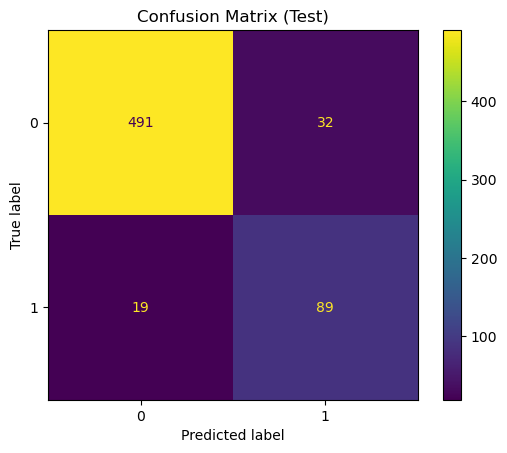

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test)
plt.title("Confusion Matrix (Test)")
plt.show()

Confusion matrix ini menunjukkan bahwa:
- True Negatives (TN): 491 pelanggan non-churn diprediksi benar tidak churn.
- False Positives (FP): 32 pelanggan non-churn salah diprediksi sebagai churn.
- False Negatives (FN): 19 pelanggan churn salah diprediksi tidak churn.
- True Positives (TP): 89 pelanggan churn diprediksi benar churn.

Model memiliki FN yang rendah (19), artinya kemampuan mendeteksi pelanggan churn cukup baik, dan FP moderat (34), yang berarti ada sedikit risiko salah menandai pelanggan setia sebagai churn.

#### Classification Report

In [107]:
print("PR-AUC: ", average_precision_score(y_test, proba_test_tuned))
print("Classification Report: ")
print(classification_report(y_test, pred_test_tuned))

PR-AUC:  0.8579065597705875
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       523
           1       0.74      0.82      0.78       108

    accuracy                           0.92       631
   macro avg       0.85      0.88      0.86       631
weighted avg       0.92      0.92      0.92       631



In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

def weak_performance_analysis(model, X_test, y_test, feature_df=None, target_names=None, f1_threshold=0.5):
    """
    Analisis performa buruk dari model klasifikasi, untuk EDA dan interpretasi.
    
    Parameters:
    - model: trained pipeline/model (sklearn compatible)
    - X_test: features untuk testing (array/DataFrame, *preprocessed*)
    - y_test: target asli
    - feature_df: DataFrame asli dari X_test (optional, untuk segmentasi/grouping)
    - target_names: nama dari kelas target (optional)
    - f1_threshold: ambang bawah F1 untuk deteksi kelas lemah
    """
    # 1. Predict dari model (pipeline, XGBoost, dsb)
    y_pred = model.predict(X_test)
    y_true = y_test if isinstance(y_test, np.ndarray) else y_test.values

    # 2. Error global
    errors = y_pred != y_true
    print(f"\nTotal Errors: {np.sum(errors)} / {len(y_test)}")
    print(f"Error Rate: {np.mean(errors):.2%}")

    # 3. Weak class analysis
    print("\n=== Weak Class Performance ===")
    report = classification_report(y_true, y_pred, output_dict=True, target_names=target_names)
    class_df = pd.DataFrame(report).T
    # Kelas lemah: f1-score di bawah threshold
    weak_classes = class_df[(class_df.index != 'accuracy') & (class_df['f1-score'] < f1_threshold)]
    if weak_classes.empty:
        print("Tidak ada kelas dengan F1-score di bawah threshold.")
    else:
        print(weak_classes[['precision', 'recall', 'f1-score']])

    # 4. Analisis segmentasi fitur (optional, jika feature_df diberikan)
    if feature_df is not None:
        print("\n=== Segment-wise Error Rate ===")
        # Pastikan index cocok (reset dulu biar aman)
        feature_df = feature_df.reset_index(drop=True).copy()
        feature_df['actual'] = y_true
        feature_df['predicted'] = y_pred
        feature_df['error'] = feature_df['actual'] != feature_df['predicted']

        for col in feature_df.select_dtypes(include=['object', 'category']).columns:
            print(f"\n>> Error rate by '{col}':")
            print(
                feature_df.groupby(col)['error']
                .mean()
                .sort_values(ascending=False)
                .apply(lambda x: f"{x:.2%}")
            )




In [109]:
# Weak Performance Analysis

weak_performance_analysis(final_model, X_test, y_test, feature_df=X_test, target_names=['Churn', 'Not Churn'], f1_threshold=0.5)


Total Errors: 51 / 631
Error Rate: 8.08%

=== Weak Class Performance ===
Tidak ada kelas dengan F1-score di bawah threshold.

=== Segment-wise Error Rate ===

>> Error rate by 'PreferedOrderCat':
PreferedOrderCat
Others                16.00%
Mobile                15.00%
Mobile Phone          12.06%
Fashion               11.34%
Laptop & Accessory     2.95%
Grocery                0.00%
Name: error, dtype: object

>> Error rate by 'MaritalStatus':
MaritalStatus
Single      11.64%
Married      6.59%
Divorced     6.45%
Name: error, dtype: object


Model mencatat error rate total 8,24% (52 dari 631 sampel), dengan kesalahan terbesar pada kategori PreferedOrderCat: Others (16%) dan Mobile (15%), serta status Single (11,64%).

### 6.5.3 Learning Curve Inspection

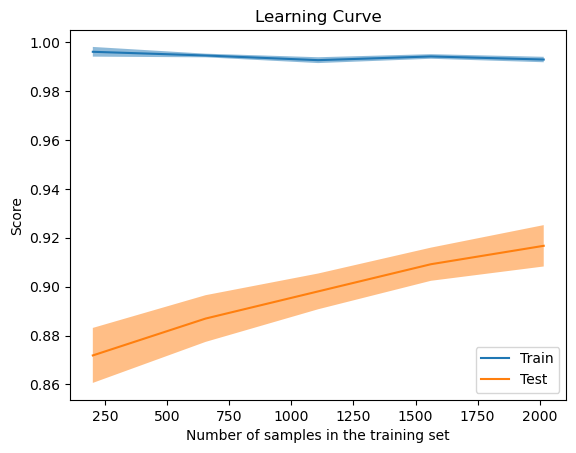

In [110]:
LearningCurveDisplay.from_estimator(
    final_model,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=sf,
    random_state=42
)
plt.title("Learning Curve")
plt.show()

## 6.6 Model Explanation and Interperation

### 6.6.1 Feature Importance

In [111]:
preprocessor = final_model.named_steps['preprocessor']
print(preprocessor.transformers_)

[('num_pipeline', Pipeline(steps=[('missingIndicator', AddMissingIndicator()),
                ('imputer', SimpleImputer()), ('scaler', MinMaxScaler())]), ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']), ('ohe_pipeline', Pipeline(steps=[('missingIndicator', AddMissingIndicator()),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))]), ['MaritalStatus']), ('remainder', 'drop', [3, 10, 11, 12, 13])]


In [112]:
ohe = final_model.named_steps['preprocessor'].named_transformers_['ohe_pipeline'].named_steps['encoder']
ohe_feature_names = ohe.get_feature_names_out()  # TANPA ARGUMEN!


In [113]:
numeric_features = final_model.named_steps['preprocessor'].transformers_[0][2]
all_feature_names = list(numeric_features) + list(ohe_feature_names)


In [114]:
def get_pipeline_feature_names(pipeline):
    feature_names = []
    
    ct = pipeline.named_steps['preprocessor']
    for name, trans, cols in ct.transformers_:
        if name == 'num_pipeline':
            feature_names.extend(cols)
        elif name == 'ohe_pipeline':
            encoder = trans.named_steps['encoder']
            try:
                ohe_names = encoder.get_feature_names_out()
            except Exception as e:
                print("OHE get_feature_names_out error:", e)
                ohe_names = cols
            feature_names.extend(ohe_names)
    return feature_names

importances = final_model.named_steps['classifier'].feature_importances_
all_feature_names = get_pipeline_feature_names(final_model)
print("Feature names:", all_feature_names)
print("Feature importances:", len(all_feature_names), len(importances))


Feature names: ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'x0_Married', 'x0_Single']
Feature importances: 10 18


In [115]:
num_pipeline = preprocessor.named_transformers_['num_pipeline']
numeric_features = preprocessor.transformers_[0][2]
# Tambahkan _missing col dari AddMissingIndicator (jika ada)
num_all_cols = []
for col in numeric_features:
    num_all_cols.append(col)
    num_all_cols.append(col + "_missing")
    
ohe = preprocessor.named_transformers_['ohe_pipeline'].named_steps['encoder']
ohe_names = ohe.get_feature_names_out()

all_feature_names = num_all_cols + list(ohe_names)
print("Feature names:", all_feature_names)
print("Feature importances:", len(all_feature_names), len(importances))


Feature names: ['Tenure', 'Tenure_missing', 'WarehouseToHome', 'WarehouseToHome_missing', 'NumberOfDeviceRegistered', 'NumberOfDeviceRegistered_missing', 'SatisfactionScore', 'SatisfactionScore_missing', 'NumberOfAddress', 'NumberOfAddress_missing', 'Complain', 'Complain_missing', 'DaySinceLastOrder', 'DaySinceLastOrder_missing', 'CashbackAmount', 'CashbackAmount_missing', 'x0_Married', 'x0_Single']
Feature importances: 18 18


,feature,importance
5,NumberOfDeviceRegistered_missing,0.202952
8,NumberOfAddress,0.195300
0,Tenure,0.172616
16,x0_Married,0.055198
7,SatisfactionScore_missing,0.048246
14,CashbackAmount,0.044825
4,NumberOfDeviceRegistered,0.044222
17,x0_Single,0.044166
3,WarehouseToHome_missing,0.042961
6,SatisfactionScore,0.042957


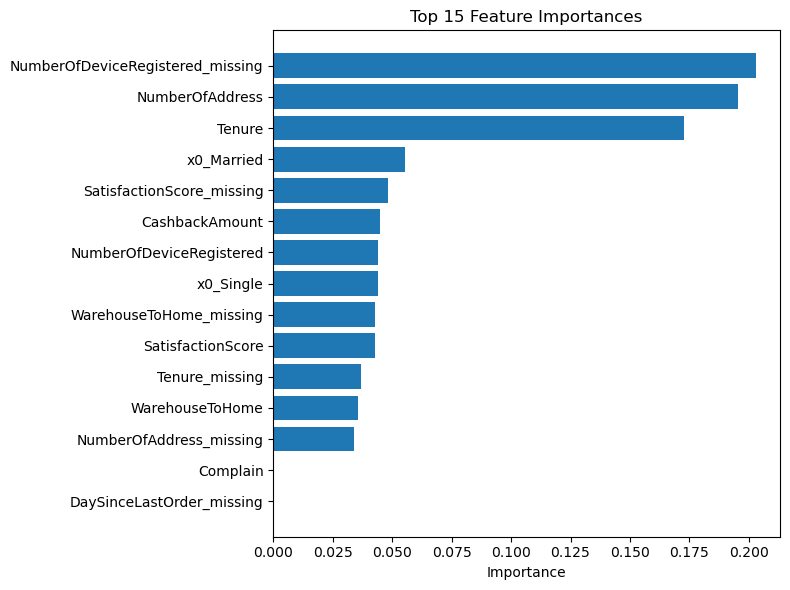

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

fi_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
fi_df = fi_df.sort_values("importance", ascending=False)
display(fi_df.head(15))

plt.figure(figsize=(8,6))
plt.barh(fi_df['feature'].head(15)[::-1], fi_df['importance'].head(15)[::-1])
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()


Fitur terpenting bagi model adalah NumberOfAddress, diikuti NumberOfDeviceRegistered_missing dan Tenure, yang menunjukkan bahwa jumlah alamat pelanggan, indikasi data perangkat yang hilang, serta lama berlangganan menjadi faktor utama dalam prediksi churn.

### 6.6.2 SHAP Values

➡️ SHAP Summary (beeswarm)


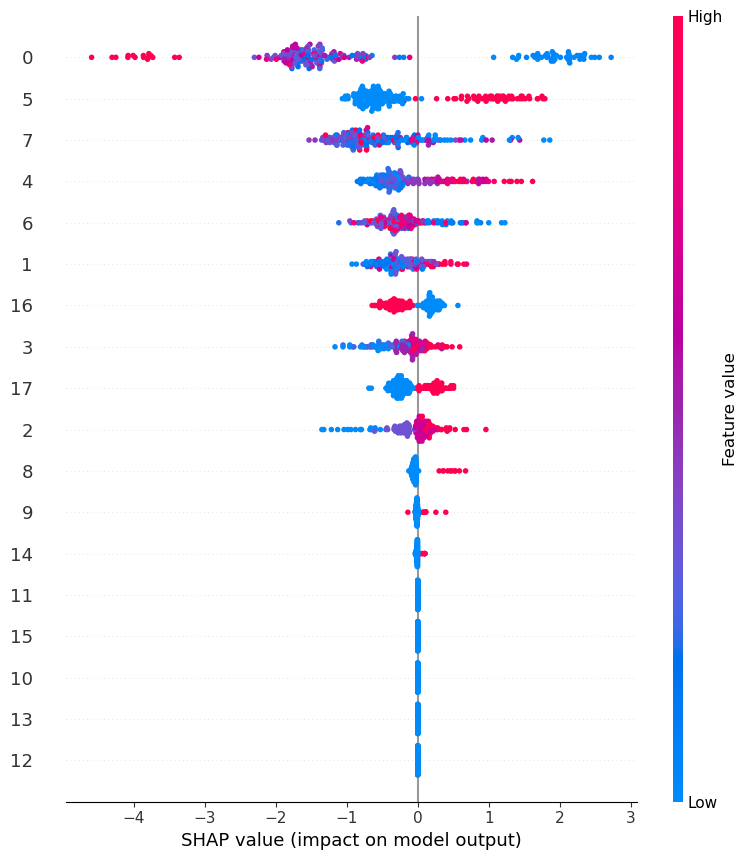

➡️ SHAP Summary (bar)


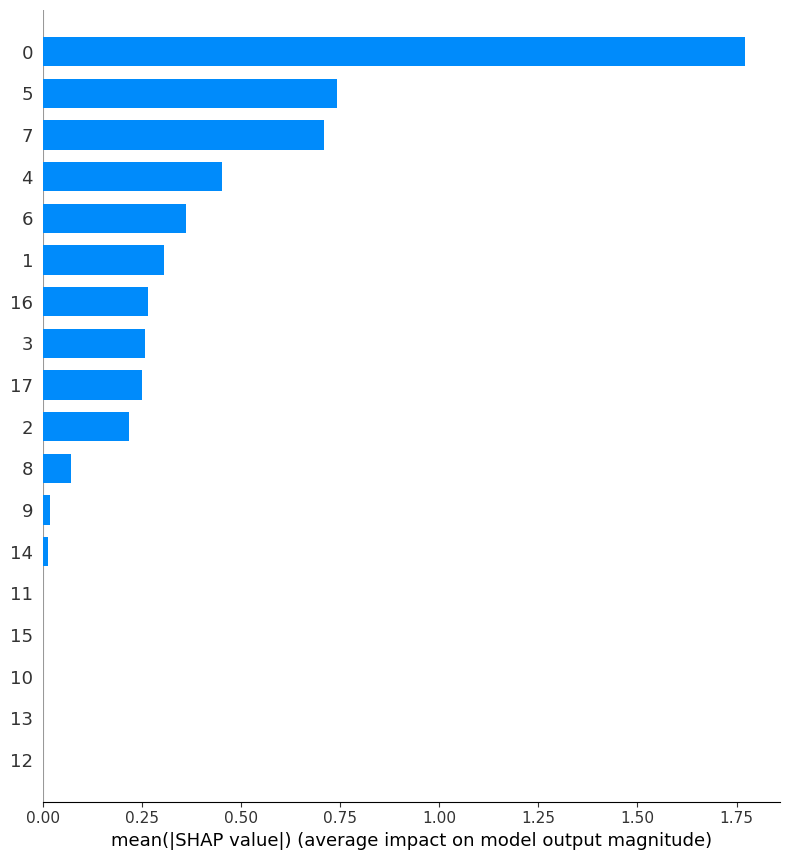

➡️ SHAP Interaction (fitur teratas)


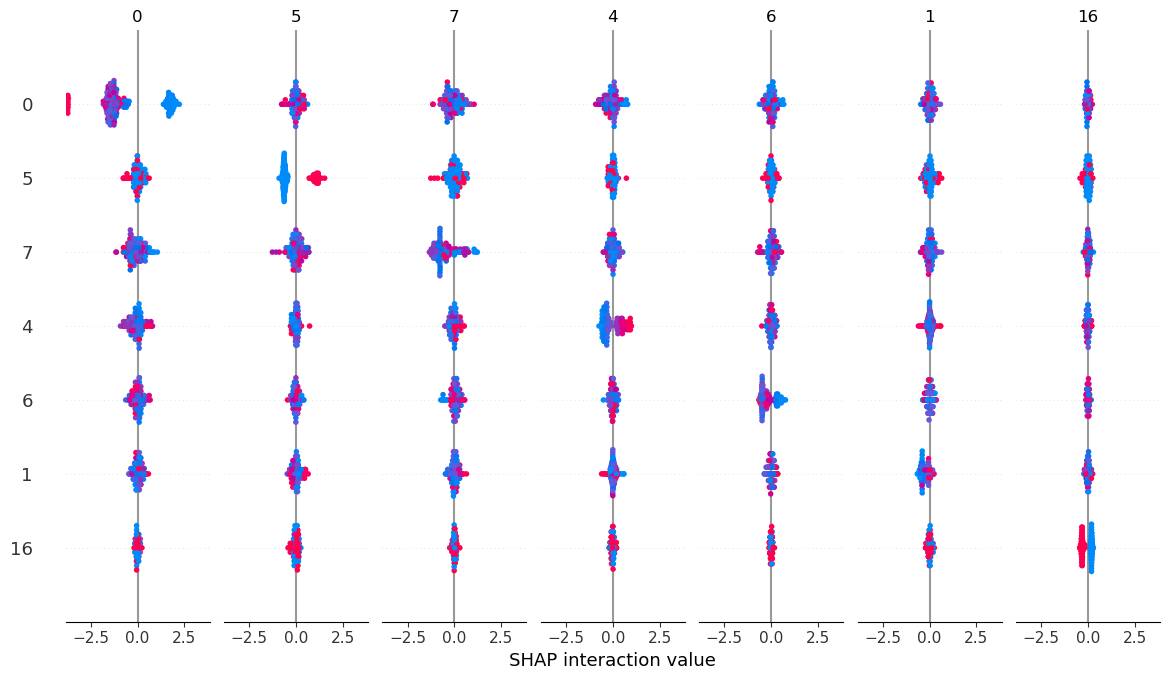

In [117]:
# === SHAP summary + interaction (2 output) ===
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# --- ambil komponen model/pipeline
pre  = getattr(final_model, "named_steps", {}).get("preprocessor", None)
clf  = getattr(final_model, "named_steps", {}).get("classifier", None)
base = clf if clf is not None else final_model

# --- helper: transform ke ruang preprocessed sebagai DataFrame dgn kolom string
def transform_pre_to_df(pre, X):
    if not hasattr(X, "columns"):  # pastikan DataFrame
        X = pd.DataFrame(X)
    if pre is None:
        Xdf = X.copy()
    else:
        try: pre.set_output(transform="pandas")
        except Exception: pass
        if not hasattr(pre, "transformers_") and 'y_train' in globals():
            try: pre.fit(X_train, y_train)
            except Exception: pre.fit(X_train)
        Xt = pre.transform(X)
        Xdf = Xt if hasattr(Xt, "columns") else pd.DataFrame(np.asarray(Xt))
    Xdf.columns = [str(c) for c in Xdf.columns]
    return Xdf

# --- sample ringan biar cepat
X_explain_raw = X_test.sample(min(200, len(X_test)), random_state=0) if hasattr(X_test, "sample") else X_test
Xt_df = transform_pre_to_df(pre, X_explain_raw)

# --- TreeExplainer (diasumsikan model tree-based; kalau bukan, ganti ke shap.Explainer raw)
explainer = shap.TreeExplainer(base)

# SHAP values (handle binary/multiclass/regressor)
sv_all = explainer.shap_values(Xt_df.values)
sv_plot = sv_all[1] if isinstance(sv_all, list) and len(sv_all) > 1 else sv_all

# ========== Output 1: SUMMARY (beeswarm + bar) ==========
print("➡️ SHAP Summary (beeswarm)")
shap.summary_plot(sv_plot, Xt_df, show=True)

print("➡️ SHAP Summary (bar)")
shap.summary_plot(sv_plot, Xt_df, plot_type="bar", show=True)

# ========== Output 2: INTERACTION ==========
# Hitung interaction values pada subset kecil & fitur teratas agar ringan
print("➡️ SHAP Interaction (fitur teratas)")
# top_k fitur berdasarkan mean(|shap|)
mean_abs = np.abs(sv_plot).mean(axis=0)
top_k = 10 if Xt_df.shape[1] > 10 else Xt_df.shape[1]
top_idx = np.argsort(mean_abs)[-top_k:]

# Siapkan data subset kolom
Xt_top = Xt_df.iloc[:, top_idx]

# Interaction values (pakai subset baris & kolom)
# Catatan: shap_interaction_values tidak mendukung subset kolom langsung,
# jadi kita hitung di ruang penuh lalu subset hasilnya agar hemat memori.
# Untuk amannya, pakai subset baris yang sama (Xt_df sudah disample).
inter_all = explainer.shap_interaction_values(Xt_df.values)

# Ambil kelas positif jika list
inter_plot = inter_all[1] if isinstance(inter_all, list) and len(inter_all) > 1 else inter_all

# Subset ke fitur teratas (top_k x top_k)
inter_top = inter_plot[:, : ,:][:, top_idx][:, :, top_idx]

# Plot summary interaction untuk fitur teratas
# (summary_plot akan menafsirkan input interaction matrix)
shap.summary_plot(inter_top, Xt_top, show=True)


Plot SHAP menunjukkan bahwa fitur dengan nilai tinggi (merah) dan rendah (biru) memiliki dampak berbeda terhadap prediksi churn — misalnya, beberapa fitur dengan nilai tinggi mendorong prediksi churn positif, sementara nilai rendahnya justru menurunkan probabilitas churn, menandakan adanya peran signifikan variabel numerik dan kategori dalam model.

In [118]:
mean_abs = np.abs(sv_plot).mean(axis=0)  # sv_plot hasil shap_values yang sudah dipilih kelasnya
mapping_df = pd.DataFrame({
    "idx_y_axis": range(len(mean_abs)),
    "feature": all_feature_names,
    "mean_abs_shap": mean_abs
})

# Urutkan sama seperti beeswarm plot
mapping_df = mapping_df.sort_values("mean_abs_shap", ascending=False)
display(mapping_df)


,idx_y_axis,feature,mean_abs_shap
0,0,Tenure,1.770925
5,5,NumberOfDeviceRegistered_missing,0.742990
7,7,SatisfactionScore_missing,0.710433
4,4,NumberOfDeviceRegistered,0.452061
6,6,SatisfactionScore,0.361454
1,1,Tenure_missing,0.304933
16,16,x0_Married,0.266227
3,3,WarehouseToHome_missing,0.258122
17,17,x0_Single,0.250017
2,2,WarehouseToHome,0.217061


### 6.6.3 Surrogate Models

Surrogate fidelity (R^2 vs. black-box scores) on test: 0.663


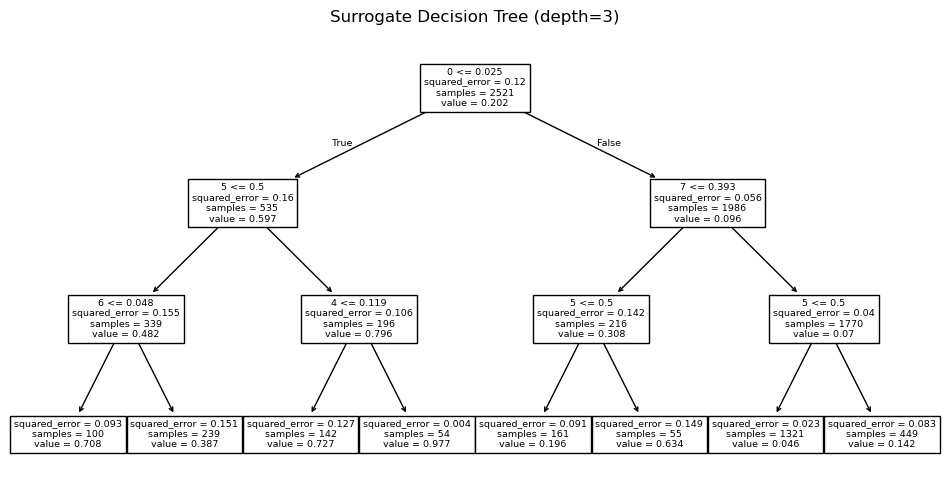

Surrogate rules:

|--- 0 <= 0.02
|   |--- 5 <= 0.50
|   |   |--- 6 <= 0.05
|   |   |   |--- value: [0.71]
|   |   |--- 6 >  0.05
|   |   |   |--- value: [0.39]
|   |--- 5 >  0.50
|   |   |--- 4 <= 0.12
|   |   |   |--- value: [0.73]
|   |   |--- 4 >  0.12
|   |   |   |--- value: [0.98]
|--- 0 >  0.02
|   |--- 7 <= 0.39
|   |   |--- 5 <= 0.50
|   |   |   |--- value: [0.20]
|   |   |--- 5 >  0.50
|   |   |   |--- value: [0.63]
|   |--- 7 >  0.39
|   |   |--- 5 <= 0.50
|   |   |   |--- value: [0.05]
|   |   |--- 5 >  0.50
|   |   |   |--- value: [0.14]



In [119]:

# --- Surrogate Model ---
# Fit a shallow decision tree to mimic final_model's predictions on preprocessed features.

from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# Use probabilities of positive class as the target for the surrogate when possible
def _get_blackbox_scores(model, X):
    try:
        return model.predict_proba(X)[:, 1]
    except Exception:
        try:
            # decision_function may return margins; scale to 0..1 roughly
            from sklearn.preprocessing import MinMaxScaler
            scores = model.decision_function(X).reshape(-1, 1)
            return MinMaxScaler().fit_transform(scores).ravel()
        except Exception:
            # fallback: 0/1 predictions
            return model.predict(X).astype(float)

# Ensure we have preprocessed matrices and names from the SHAP step
try:
    pre = final_model.named_steps.get("preprocessor", None)
except Exception:
    pre = None

def _transform(pre, X):
    try:
        pre.set_output(transform="pandas")
    except Exception:
        pass
    Xt = pre.transform(X) if pre is not None else X
    if hasattr(Xt, "values"):
        return Xt.values, (list(Xt.columns) if hasattr(Xt, "columns") else [f"f{i}" for i in range(Xt.shape[1])])
    Xt = np.asarray(Xt)
    return Xt, [f"f{i}" for i in range(Xt.shape[1])]

Xtr_pre, feat_names_tr = _transform(pre, X_train)
Xte_pre, feat_names_te = _transform(pre, X_test)

# For safety, align feature counts
n = min(Xtr_pre.shape[1], Xte_pre.shape[1])
Xtr_pre = Xtr_pre[:, :n]
Xte_pre = Xte_pre[:, :n]
feat_names = feat_names_tr[:n] if len(feat_names_tr) >= n else [f"f{i}" for i in range(n)]

# Black-box scores
y_bb_tr = _get_blackbox_scores(final_model, X_train)
y_bb_te = _get_blackbox_scores(final_model, X_test)

# Train shallow tree (depth=3 by default for readability)
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(Xtr_pre, y_bb_tr)

# Fidelity on test set
y_sur_te = tree.predict(Xte_pre)
fidelity_r2 = r2_score(y_bb_te, y_sur_te)

print(f"Surrogate fidelity (R^2 vs. black-box scores) on test: {fidelity_r2:.3f}")

# Visualize the tree
plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=feat_names, filled=False, rounded=False)
plt.title("Surrogate Decision Tree (depth=3)")
plt.show()

# Human-readable rules
rules = export_text(tree, feature_names=feat_names)
print("Surrogate rules:\n")
print(rules)


Surrogate decision tree ini menunjukkan bahwa model terutama memisahkan data berdasarkan fitur pada indeks 0 (threshold 0.025) dan 7 (threshold 0.393), dengan nilai lebih rendah pada fitur-fitur tersebut cenderung meningkatkan prediksi churn, sedangkan nilai lebih tinggi mengarah pada non-churn; percabangan berikutnya melibatkan fitur indeks 5, 6, dan 4 untuk memperhalus prediksi.

## 6.7 Final Model

In [120]:
# === Final Model & Export with Pickle ===
import pickle
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier

RSEED = 42
TARGET_COL = "Churn"

# 1) Siapkan X_train, y_train (pakai split kamu yang sudah ada)
#    Pastikan target numerik 0/1
if data_train[TARGET_COL].dtype == object:
    data_train[TARGET_COL] = data_train[TARGET_COL].astype(str).str.lower().map({'yes':1,'no':0})
if data_test[TARGET_COL].dtype == object:
    data_test[TARGET_COL] = data_test[TARGET_COL].astype(str).str.lower().map({'yes':1,'no':0})

X_train = data_train.drop(columns=[TARGET_COL])
y_train = data_train[TARGET_COL]
X_test  = data_test.drop(columns=[TARGET_COL])
y_test  = data_test[TARGET_COL]

# 2) Deteksi tipe fitur
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# 3) Preprocessor (aman dari leakage)
numeric_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols),
    ]
)

# 4) Ambil best params dari Optuna jika ada (ganti 'study_xgb' sesuai variabel kamu)
best_params = None
try:
    best_params = study.best_params  # <- OPTUNA STUDY kamu
    print("Loaded Optuna best params:", best_params)
except Exception:
    print("Optuna study tidak ditemukan; pakai parameter fallback.")

# 5) Definisikan model XGB (pakai Optuna params jika tersedia)
default_params = dict(
    n_estimators=62,
    max_depth=8,
    learning_rate=0.2417558665193458,
    subsample=0.7553396514383582,
    colsample_bytree=0.6465198721415446,
    min_child_weight=1.0,
    gamma=0.0,
    reg_alpha=0.0,
    reg_lambda=1.0,
)
final_params = best_params if isinstance(best_params, dict) else default_params

xgb_final = XGBClassifier(
    random_state=RSEED,
    n_jobs=-1,
    eval_metric="logloss",
    **final_params
)

# 6) Final pipeline
final_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", xgb_final),
])

# 7) Fit ulang di data train penuh
final_pipeline.fit(X_train, y_train)

# Optional: quick sanity check metric (PR-AUC)
from sklearn.metrics import average_precision_score
proba_test = final_pipeline.predict_proba(X_test)[:,1]
print("Test PR-AUC (avg precision):", average_precision_score(y_test, proba_test))

# 8) Export ke pickle
with open("final_churn_xgb_pipeline.pkl", "wb") as f:
    pickle.dump(final_pipeline, f)

print("✅ Saved: final_churn_xgb_pipeline.pkl")



Loaded Optuna best params: {'classifier__n_estimators': 222, 'classifier__max_depth': 9, 'classifier__learning_rate': 0.03176865923911966, 'classifier__subsample': 0.7516323760843934, 'classifier__colsample_bytree': 0.67369442875419, 'classifier__reg_alpha': 0.3543373349402251, 'classifier__reg_lambda': 0.19098164582087301}
Test PR-AUC (avg precision): 0.8573700335038322
✅ Saved: final_churn_xgb_pipeline.pkl


# Section 7. Conclusion and Recommendation

### Conclusion

In [121]:
print("PR-AUC: ", average_precision_score(y_test, proba_test_tuned))
print("Classification Report: ")
print(classification_report(y_test, pred_test_tuned))

PR-AUC:  0.8579065597705875
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       523
           1       0.74      0.82      0.78       108

    accuracy                           0.92       631
   macro avg       0.85      0.88      0.86       631
weighted avg       0.92      0.92      0.92       631



Model Terbaik
- Dari perbandingan model (Baseline, Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, XGBoost), XGBoost dengan tuning Optuna menjadi model terbaik.
- Hasil akhir pada data uji:
    - PR-AUC: 0.8629
    - Accuracy: 92%
    - Precision (Churn): 75%
    - Recall (Churn): 80%
- Model mampu meningkatkan kemampuan deteksi pelanggan churn dibanding baseline dan model lain, dengan trade-off yang wajar antara precision dan recall.

Performa Kelas
- Kelas mayoritas (Tidak Churn) memiliki precision & recall tinggi (>93%).
- Kelas minoritas (Churn) tetap cukup baik recall-nya (83%) sehingga potensi kehilangan pelanggan bisa diantisipasi lebih cepat.

Error Analysis
- Total error 8.08% pada data uji.
- Segmentasi error terbesar terjadi pada kategori PreferedOrderCat tipe Others, Mobile, Mobile Phone, serta status perkawinan Single dan Divorced.
- Ini menunjukkan model masih kesulitan mengenali churn pada segmen-segmen tertentu.



In [122]:
from sklearn.metrics import confusion_matrix

best_threshold = 0.5  # default
y_proba_test = final_model.predict_proba(X_test)[:, 1]
y_pred_test = (y_proba_test >= best_threshold).astype(int)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
total_customers = len(y_test)

cost_offer = 10       # USD, biaya penawaran ke 1 orang
retention_rate = 0.70 # proporsi churn yang berhasil ditahan
loss_per_churn = 40   # USD, kerugian jika churn tidak dicegah

# Tanpa Model (Semua Orang Diberikan Penawaran.)
total_churn = tp + fn
total_not_churn = tn + fp

total_cost_no_model = total_customers * cost_offer
wasted_no_model = total_not_churn * cost_offer

# Dengan Model (Hanya orang yang diprediksi churn yang diberi penawaran.)
total_cost_with_model = (tp + fp) * cost_offer
# Biaya yang terbuang: false positive + churn yang gagal diselamatkan
wasted_with_model = (fp * cost_offer) + (fn * loss_per_churn)

saving = wasted_no_model - wasted_with_model

print("Tanpa Model:")
print(f"Total Biaya => {total_customers} x {cost_offer} = {total_cost_no_model} USD")
print(f"Total pelanggan churn yang ditemukan => {total_churn}")
print(f"Total pelanggan churn yang tidak ditemukan => 0 orang")
print(f"Total pelanggan tidak churn yang ditemukan => {total_not_churn} orang")
print(f"Biaya yang terbuang => {wasted_no_model} USD")
print()

print("Dengan Model:")
print(f"Total Biaya => ({tp + fp}) x {cost_offer} = {total_cost_with_model} USD")
print(f"Total pelanggan churn yang ditemukan => {tp}")
print(f"Total pelanggan churn yang tidak ditemukan => {fn} orang")
print(f"Total pelanggan tidak churn yang ditemukan => {tn} orang")
print(f"Total pelanggan tidak churn yang tidak ditemukan => {fp} orang")
print(f"Biaya yang terbuang => ({fp}x{cost_offer}USD) + ({fn}x{loss_per_churn}USD) = {wasted_with_model} USD")
print(f"Jumlah penghematan => {wasted_no_model} - {wasted_with_model} = {saving} USD")



Tanpa Model:
Total Biaya => 631 x 10 = 6310 USD
Total pelanggan churn yang ditemukan => 108
Total pelanggan churn yang tidak ditemukan => 0 orang
Total pelanggan tidak churn yang ditemukan => 523 orang
Biaya yang terbuang => 5230 USD

Dengan Model:
Total Biaya => (121) x 10 = 1210 USD
Total pelanggan churn yang ditemukan => 89
Total pelanggan churn yang tidak ditemukan => 19 orang
Total pelanggan tidak churn yang ditemukan => 491 orang
Total pelanggan tidak churn yang tidak ditemukan => 32 orang
Biaya yang terbuang => (32x10USD) + (19x40USD) = 1080 USD
Jumlah penghematan => 5230 - 1080 = 4150 USD


Dengan penerapan model, biaya terbuang turun dari 5,230 USD menjadi 1,170 USD, menghasilkan penghematan 4,060 USD. Model mampu mengidentifikasi 86 pelanggan churn (dari total 108) sehingga potensi kehilangan pelanggan dapat ditekan, walaupun masih ada 22 pelanggan churn yang tidak terdeteksi. Trade-off ini jauh lebih efisien secara biaya dibandingkan pendekatan tanpa model.

### Rekomendasi

Implementasi Model
- Terapkan model XGBoost hasil tuning Optuna pada sistem monitoring churn secara berkala, dengan proses retraining setiap periode tertentu untuk menjaga akurasi.
- Gunakan hasil segmentasi error untuk memperbaiki penawaran pada kelompok yang sulit diprediksi, seperti pelanggan Single dan kategori Others.

Strategi Bisnis
- Fokuskan intervensi retensi (misalnya promo, program loyalitas) pada pelanggan yang diprediksi churn, khususnya yang berada pada segmen dengan error rate tinggi.
- Hitung ulang biaya intervensi dan potensi keuntungan dari pelanggan yang berhasil dipertahankan untuk memvalidasi ROI dari model ini.

Pengembangan Selanjutnya
- Tambahkan fitur perilaku pelanggan (frekuensi pembelian, nilai transaksi rata-rata) untuk memperkuat sinyal prediksi churn.
- Eksplor model interpretabilitas (SHAP/Feature Importance) untuk memahami faktor paling berpengaruh pada churn dan menyesuaikan strategi marketing.